#**Lending Club Case Study - Exploratory Data Analysis**

---


Submitted by:

Saheli Das

Harikrushn Raiyani


# **Lending Club**

---



Lending Club is a peer to peer lending company based in the United States, in which investors provide funds for potential borrowers and investors earn a profit depending on the risk they take (the borrowers credit score). Lending Club provides the "bridge" between investors and borrowers. For more basic information about the company please check out the wikipedia article about the company.

# **Business Objectives**

---



Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

# **Lending Club Loan Dataset**

---



The dataset contains complete loan data for all loans issued through the 2007–2011, including the current loan status (Current, Charged-off, Fully Paid) and latest payment information. Additional features include credit scores, number of finance inquiries, and collections among others. The file is a matrix of about 39 thousand observations and 111 variables. A Data Dictionary is provided in a separate file in the dataset. 

# **Exploratory Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from prettytable import PrettyTable

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Data Load**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/upgrad/loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Number of features in the dataset

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
# The dataset has 111 nos of features and 39717 nos of datapoints
df.shape

(39717, 111)

# **Data Cleaning**

---



In [6]:
def datadisplay(df):
  x= PrettyTable()
  x.field_names = df.columns
  for index, row in df.iterrows():
    x.add_row(row)
  return x


 **Total no's of Null value in each features**





In [7]:
x=pd.DataFrame(df.isnull().sum())
x.reset_index(inplace=True)
x.rename(columns={'index':'feature',0:'count'},inplace=True)
print(datadisplay(x))

+--------------------------------+-------+
|            feature             | count |
+--------------------------------+-------+
|               id               |   0   |
|           member_id            |   0   |
|           loan_amnt            |   0   |
|          funded_amnt           |   0   |
|        funded_amnt_inv         |   0   |
|              term              |   0   |
|            int_rate            |   0   |
|          installment           |   0   |
|             grade              |   0   |
|           sub_grade            |   0   |
|           emp_title            |  2459 |
|           emp_length           |  1075 |
|         home_ownership         |   0   |
|           annual_inc           |   0   |
|      verification_status       |   0   |
|            issue_d             |   0   |
|          loan_status           |   0   |
|           pymnt_plan           |   0   |
|              url               |   0   |
|              desc              | 12940 |
|          

**Drop the features which have more than 50% or more Null values**

In [8]:
min_count =  int((50/100)*df.shape[0] )
loan_data = df.dropna( axis=1, thresh=min_count)

**the shape of the dataset after dropping the features which have more than 50% Null values**

In [9]:
loan_data.shape

(39717, 54)

**The null values present in the data set after dropping the features which have more than 50 % null values**

In [10]:
nan_columns = loan_data. isna(). any()
columns_with_nan = loan_data. columns[nan_columns]. tolist()
x=pd.DataFrame(loan_data[columns_with_nan].isnull().sum())

x.reset_index(inplace=True)
x.rename(columns={'index':'feature',0:'count'},inplace=True)
print(datadisplay(x))

+----------------------------+-------+
|          feature           | count |
+----------------------------+-------+
|         emp_title          |  2459 |
|         emp_length         |  1075 |
|            desc            | 12940 |
|           title            |   11  |
|         revol_util         |   50  |
|        last_pymnt_d        |   71  |
|     last_credit_pull_d     |   2   |
| collections_12_mths_ex_med |   56  |
|  chargeoff_within_12_mths  |   56  |
|    pub_rec_bankruptcies    |  697  |
|         tax_liens          |   39  |
+----------------------------+-------+


**Number of unique values in the features ['desc','emp_title','url']**

In [11]:
loan_data[['desc','emp_title','url']].nunique()

desc         26527
emp_title    28820
url          39717
dtype: int64

After analysing the data,it has been cleary shown tha the column named -'emp_title','desc' and 'url'are having unique data 
  which will not help us to get any information .So that these columns have been dropped



In [12]:
loan_data=loan_data.drop(['emp_title','desc','url'],axis=1)

In [13]:
def unique_value(x,loan_data):
  print('{}:{}\n'.format(x,loan_data[x]. unique()))

**The unique values of the features ['acc_now_delinq','application_type','policy_code','initial_list_status','delinq_amnt']**

In [14]:
feature=['acc_now_delinq','application_type','policy_code','initial_list_status','delinq_amnt']
for i in feature:
  unique_value(i,loan_data)

acc_now_delinq:[0]

application_type:['INDIVIDUAL']

policy_code:[1]

initial_list_status:['f']

delinq_amnt:[0]





1.**pymnt_plan**

pymnt_plan indicates if a payment plan has been put in place for the loan .But in the dataset, all values are 'n'.
So we can conlude there is no such plan has been put in place for the loan.

2.**Zip_code**

The loan assesment has not been dependent on borrower's Zip_code

3.**acc_now_delinq**

acc_now_delinq means the number of accounts on which the borrower is now delinquent.But in the dataset, all values are '0'.So we can conlude there is no number of accounts on which the borrower is now delinquent or there is some fault in data

4.**application_type**

application_type is here 'INDIVIDUAL' as there are no other type of application has been submitted for loan

5.**policy_code**

policy_code is here 1 which means all policies are publicly available.

6.**initial_list_status**

All the values of initial_list_status are 'f' which does not give any information that is required for the analysis

7.**delinq_amnt**

All the values of delinq_amnt are 0 so that we can conclude the past-due amount owed for the accounts on which the borrower is now delinquent is 0 or there are some error in the data.
     
     

Because of the above reasons these columns have been dropped as they are not giving any information.

In [15]:
loan_data=loan_data.drop(['pymnt_plan','zip_code','acc_now_delinq','application_type','policy_code','initial_list_status','delinq_amnt'],axis=1)

In [16]:
loan_data.shape

(39717, 44)

**Finding Duplicate entry**

In [17]:
loan_data[loan_data.duplicated(subset=['id','member_id'])==True].count()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

The id and member_id should be unique for each data points.Here we have tried to find the duplicate entry based on id and member_id and from the above analysis we can conclude there is no duplicate entry in the data set

As the columns ['id','member_id'] having unique values so these may have nothing to contribute to the analysis .these have been droped from the dataset

In [18]:
loan_data=loan_data.drop(['id','member_id'],axis=1)

In [19]:
loan_data.shape

(39717, 42)

**The unique values of the features['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']**

In [20]:
feature=['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']
for i in feature:
  unique_value(i,loan_data)

collections_12_mths_ex_med:[ 0. nan]

chargeoff_within_12_mths:[ 0. nan]

tax_liens:[ 0. nan]



**The percentage of Null values in the featurs ['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']**




In [21]:
(loan_data[['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']].isnull().sum()/loan_data.shape[0])*100

collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
tax_liens                     0.098195
dtype: float64

The columns ['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']are having values [ 0., nan] and also it has been observed the percentage of null value in these columns are very less .So that we can conclude there is some error while taking the data or 

   Number of collections in 12 months excluding medical collections=0

   Number of charge-offs within 12 months=0

   Number of tax liens=0
   
   So that these features did not have significant impact to the analysis.
   That is why these columns have been dropped from the data set

In [22]:
loan_data=loan_data.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis=1)

In [23]:
loan_data.shape

(39717, 39)

In [24]:
loan_data.title.describe()

count                  39706
unique                 19615
top       Debt Consolidation
freq                    2184
Name: title, dtype: object

**The number of data points in each category   of the feature "title"**

In [25]:
x=pd.DataFrame(loan_data.title.value_counts())
x.reset_index(inplace=True)
x.rename(columns={'index':'feature',0:'count'},inplace=True)
print(datadisplay(x)[:20])


+---------------------------+-------+
|          feature          | title |
+---------------------------+-------+
|     Debt Consolidation    |  2184 |
|  Debt Consolidation Loan  |  1729 |
|       Personal Loan       |  659  |
|       Consolidation       |  517  |
|     debt consolidation    |  505  |
| Credit Card Consolidation |  356  |
|      Home Improvement     |  356  |
|     Debt consolidation    |  334  |
|    Small Business Loan    |  328  |
|      Credit Card Loan     |  317  |
|          Personal         |  308  |
|     Consolidation Loan    |  255  |
|   Home Improvement Loan   |  247  |
|       personal loan       |  234  |
|          personal         |  220  |
|            Loan           |  213  |
|        Wedding Loan       |  208  |
|       consolidation       |  205  |
|          Car Loan         |  204  |
|         Other Loan        |  191  |
+---------------------------+-------+


The 'title' means the loan title provided by the borrower where the purpose of the loan has been described.It contains 19615 unique values which is almost half of the total data points.The 'purpose' is a category which is provided by the borrower for the time of loan request, where the whole informations getting from the title feature are captured in the 14 catagories.

So that we can drop the feature 'title'.


In [26]:
loan_data=loan_data.drop(['title'],axis=1)

In [27]:
loan_data.shape

(39717, 38)

**Removing '%' from the end of the data** 

In [28]:
loan_data['int_rate']=loan_data['int_rate'].str.rstrip('%')
loan_data['revol_util']=loan_data['revol_util'].str.rstrip('%')

In [29]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [30]:
loan_data['term']=loan_data['term'].str.replace(' months','')

In [31]:
loan_data['term'].unique()

array([' 36', ' 60'], dtype=object)

# **Derived Metrics**

Seperating the month and year from the column issue_d and drop the column 

In [32]:
loan_data['issue_d']=pd.to_datetime(loan_data['issue_d'],format='%b-%y')
loan_data['issue_d_year']=loan_data['issue_d'].dt.year
loan_data['issue_d_month']=loan_data['issue_d'].dt.month
loan_data=loan_data.drop(['issue_d'],axis=1)

Seperating the month and year from the column last_pymnt_d

In [33]:
loan_data['last_pymnt_d']=pd.to_datetime(loan_data['last_pymnt_d'],errors='ignore',format='%b-%y')
loan_data['last_pymnt_d_year']=loan_data['last_pymnt_d'].dt.year.astype('Int64')
loan_data['last_pymnt_d_month']=loan_data['last_pymnt_d'].dt.month.astype('Int64')
loan_data=loan_data.drop(['last_pymnt_d'],axis=1)

Seperating the month and year from the column last_credit_pull_d

In [34]:
loan_data['last_credit_pull_d']=pd.to_datetime(loan_data['last_credit_pull_d'],format='%b-%y')
loan_data['last_credit_pull_d_year']=loan_data['last_credit_pull_d'].dt.year.astype('Int64')
loan_data['last_credit_pull_d_month']=loan_data['last_credit_pull_d'].dt.month.astype('Int64')
loan_data=loan_data.drop(['last_credit_pull_d'],axis=1)

Seperating the month and year from the column earliest_cr_line

In [35]:
loan_data['earliest_cr_line']=pd.to_datetime(loan_data['earliest_cr_line'],format='%b-%y')
loan_data['earliest_cr_line_year']=loan_data['earliest_cr_line'].dt.year.astype('Int64')
loan_data['earliest_cr_line_month']=loan_data['earliest_cr_line'].dt.month.astype('Int64')
loan_data=loan_data.drop(['earliest_cr_line'],axis=1)

In [36]:
loan_data.shape

(39717, 42)

Creating a new feature 'loan_amount_vs_annual_inc_ratio'

In [37]:
loan_data['loan_amount_vs_annual_inc_ratio']=(loan_data['loan_amnt']/loan_data['annual_inc'])*100

# **Analysis**

# **Feature loan_amnt:**
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


**Finding Null values**

In [38]:
print('{}% value as empty for feature:loan_amnt'.format(round(((loan_data.loan_amnt.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:loan_amnt


In [39]:
loan_data['loan_amnt'].describe()


count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

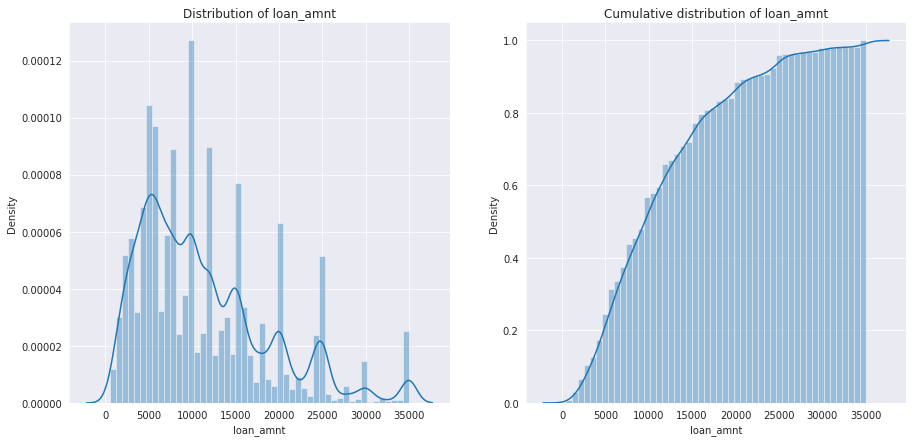

In [40]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
sns.distplot(loan_data['loan_amnt'],ax= axes[0])
axes[0].set_title('Distribution of loan_amnt')

kwargs = {'cumulative': True}
sns.distplot(loan_data['loan_amnt'],hist_kws=kwargs, kde_kws=kwargs,ax= axes[1])
axes[1].set_title('Cumulative distribution of loan_amnt')

plt.show()

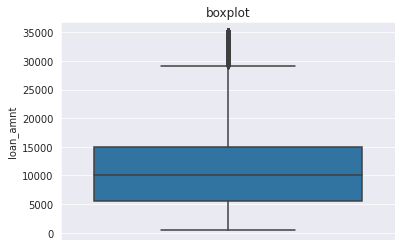

In [41]:
sns.boxplot(y=loan_data['loan_amnt'])
plt.title('boxplot')
plt.show()

**Percentile analysis of loan amount**

In [42]:
for i in range(0,101,10):
    print('{} percetile {}'.format(i,np.percentile(loan_data['loan_amnt'],i)))

0 percetile 500.0
10 percetile 3200.0
20 percetile 5000.0
30 percetile 6000.0
40 percetile 8000.0
50 percetile 10000.0
60 percetile 12000.0
70 percetile 14000.0
80 percetile 16750.0
90 percetile 22000.0
100 percetile 35000.0


In [43]:
for i in range(90,101,1):
    print('{} percetile {}'.format(i,np.percentile(loan_data['loan_amnt'],i)))

90 percetile 22000.0
91 percetile 24000.0
92 percetile 24250.0
93 percetile 25000.0
94 percetile 25000.0
95 percetile 25000.0
96 percetile 25484.000000000015
97 percetile 30000.0
98 percetile 31468.00000000003
99 percetile 35000.0
100 percetile 35000.0



**Observation**

The distribution of the loan_amnt status is right skewed So that we can conclude more person have taken less loan amount and very less person have taken very large loan amount.

The loan amount varies from 500 to 35000 where 75% person have taken less or equal to loan amount of 15000 and 90% person have taken less or equal lone amount of 22000.Very few people have taken more than 22000 amount as loan

# **Feature loan_status :**

Current status of the loan

**Finding Null values**

In [44]:
print('{}% value as empty for feature:loan_status'.format(round(((loan_data.loan_status.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:loan_status


**Number of data points in each category  of loan status**

In [45]:
loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

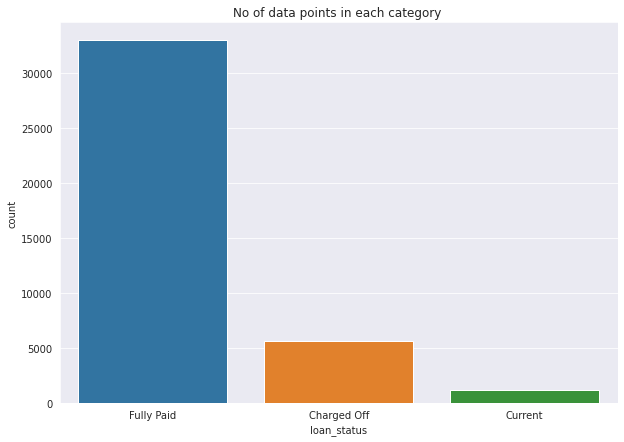

In [46]:
plt.figure(figsize=(10,7))
sns.countplot(loan_data['loan_status'])
plt.title('No of data points in each category ')
plt.show()

In [47]:
df_loan_status_perc = pd.DataFrame((loan_data['loan_status'].value_counts()/loan_data.shape[0]*100).round(2))
df_loan_status_perc.reset_index(inplace = True)
df_loan_status_perc.rename(columns = {'index':'loan_status','loan_status':'percentage(%)'},inplace= True)
print('The percentage of loan in each category  of loan status')
print(datadisplay(df_loan_status_perc))



The percentage of loan in each category  of loan status
+-------------+---------------+
| loan_status | percentage(%) |
+-------------+---------------+
|  Fully Paid |     82.96     |
| Charged Off |     14.17     |
|   Current   |      2.87     |
+-------------+---------------+


**Observation**

Almost 83% loans are fully paid.only 14% loans are defaulters

# Analysis between 'loan_status' and 'loan_amnt'

**The average loan amount has been taken as per the loan status**

In [48]:
x=pd.DataFrame(loan_data.groupby('loan_status').loan_amnt.mean().sort_values(ascending = False).round(2))
x.reset_index(inplace=True)
print('The average loan amount has been taken as per the loan status')
print(datadisplay(x))

The average loan amount has been taken as per the loan status
+-------------+-----------+
| loan_status | loan_amnt |
+-------------+-----------+
|   Current   |  17053.99 |
| Charged Off |  12104.39 |
|  Fully Paid |  10866.46 |
+-------------+-----------+


**Observation**

The average loan amount has been sanctioned for charged off loan is little more than the average loan amount has been sanctioned for fully paid loan.

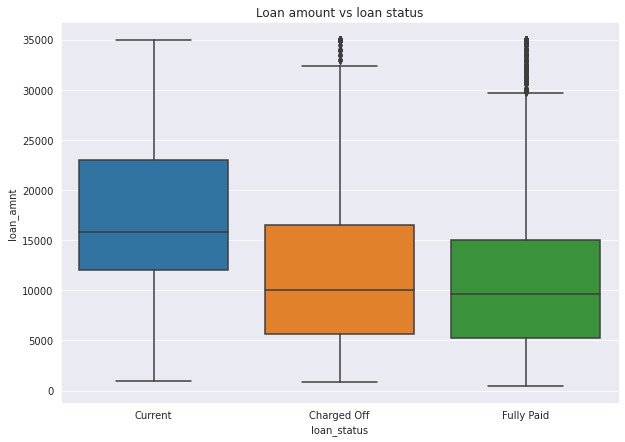

+-------------+---------+----------+---------+--------+---------+---------+---------+---------+
| loan_status |  count  |   mean   |   std   |  min   |   25%   |   50%   |   75%   |   max   |
+-------------+---------+----------+---------+--------+---------+---------+---------+---------+
| Charged Off |  5627.0 | 12104.39 | 8085.73 | 900.0  |  5600.0 | 10000.0 | 16500.0 | 35000.0 |
|   Current   |  1140.0 | 17053.99 | 8651.05 | 1000.0 | 12000.0 | 15825.0 | 23000.0 | 35000.0 |
|  Fully Paid | 32950.0 | 10866.46 | 7199.63 | 500.0  |  5200.0 |  9600.0 | 15000.0 | 35000.0 |
+-------------+---------+----------+---------+--------+---------+---------+---------+---------+


In [49]:
plt.figure(figsize=(10,7))
order_desc = loan_data.groupby('loan_status').loan_amnt.median().sort_values(ascending = False).index
sns.boxplot(x= loan_data.loan_status, y = loan_data.loan_amnt,order = order_desc)
plt.title('Loan amount vs loan status')
plt.show()
x = pd.DataFrame(loan_data.groupby('loan_status').loan_amnt.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

The amount has been taken by the 50% borrowers in case of Charged off loan is little more than fully paid.The percentage of charged off loans increased with the sanctioned loan amount 

# **Feature int_rate :**

Interest Rate on the loan

**Finding Null values**

In [50]:
print('{}% value as empty for feature:int_rate'.format(round(((loan_data.int_rate.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:int_rate


In [51]:
loan_data['int_rate']=loan_data['int_rate'].astype('float32')
loan_data['int_rate'].describe()

count    39717.000000
mean        12.020760
std          3.724828
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

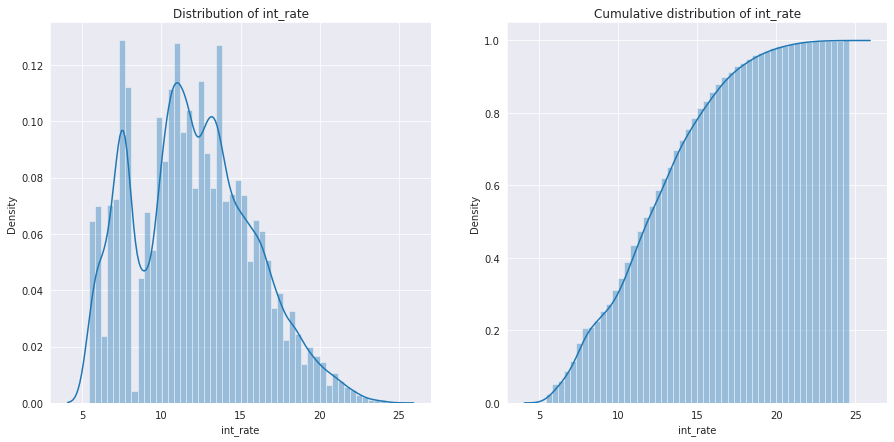

In [52]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
sns.distplot(loan_data['int_rate'],ax= axes[0])
axes[0].set_title('Distribution of int_rate')

kwargs = {'cumulative': True}
sns.distplot(loan_data['int_rate'],hist_kws=kwargs, kde_kws=kwargs,ax= axes[1])
axes[1].set_title('Cumulative distribution of int_rate')

plt.show()

**Percentile analysis of int_rate**

In [53]:
for i in range(0,101,10):
    print('{} percetile {}'.format(i,np.percentile(loan_data['int_rate'],i)))

0 percetile 5.420000076293945
10 percetile 7.139999866485596
20 percetile 7.900000095367432
30 percetile 9.989999771118164
40 percetile 10.989999771118164
50 percetile 11.859999656677246
60 percetile 12.869999885559082
70 percetile 13.920000076293945
80 percetile 15.270000457763672
90 percetile 16.889999389648438
100 percetile 24.59000015258789


In [54]:
for i in range(90,101,1):
    print('{} percetile {}'.format(i,np.percentile(loan_data['int_rate'],i)))

90 percetile 16.889999389648438
91 percetile 17.270000457763672
92 percetile 17.510000228881836
93 percetile 17.8799991607666
94 percetile 18.25
95 percetile 18.540000915527344
96 percetile 19.030000686645508
97 percetile 19.420000076293945
98 percetile 20.25
99 percetile 20.989999771118164
100 percetile 24.59000015258789


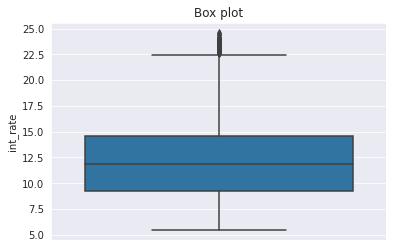

In [55]:
sns.boxplot(y=loan_data['int_rate'])
plt.title('Box plot')
plt.show()

**Observation**

Interest Rate on the loan varies from 5.42% to 24.59% where 75% person have paid interest less or equal to 14.5% against loan amount where as 90% person have paid interest less or equal to  17%. Very few person have paid above 20% interest against loan amount.

# Analysis between 'loan_status' and 'int_rate'

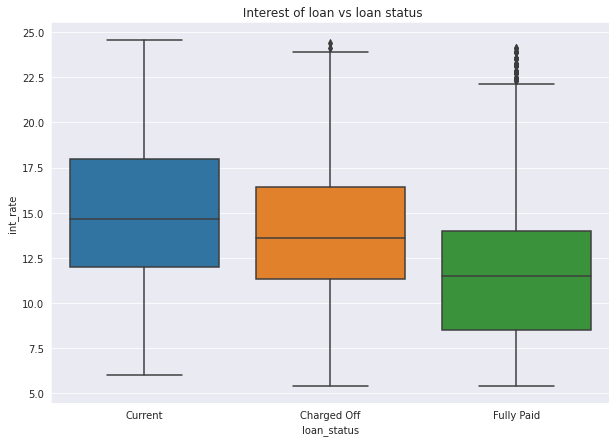

+-------------+---------+-------+------+------+-------+-------+-------+-------+
| loan_status |  count  |  mean | std  | min  |  25%  |  50%  |  75%  |  max  |
+-------------+---------+-------+------+------+-------+-------+-------+-------+
| Charged Off |  5627.0 | 13.82 | 3.65 | 5.42 | 11.31 | 13.61 |  16.4 |  24.4 |
|   Current   |  1140.0 | 15.03 | 3.6  | 6.0  | 11.99 | 14.65 | 17.99 | 24.59 |
|  Fully Paid | 32950.0 | 11.61 | 3.6  | 5.42 |  8.49 | 11.49 | 13.99 | 24.11 |
+-------------+---------+-------+------+------+-------+-------+-------+-------+


In [56]:
plt.figure(figsize=(10,7))
order_desc = loan_data.groupby('loan_status').int_rate.median().sort_values(ascending = False).index
sns.boxplot(x= loan_data.loan_status, y = loan_data.int_rate,order = order_desc)
plt.title(' Interest of loan vs loan status')
plt.show()
x = pd.DataFrame(loan_data.groupby('loan_status').int_rate.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

The avg interest of the chargged off loan is higher that the fully paid loan.
As the interest rate of the loan goes high, the possibility of being a loan as Charged off is higher than Fully Paid.

# Analysis between 'loan amount' and 'int_rate'

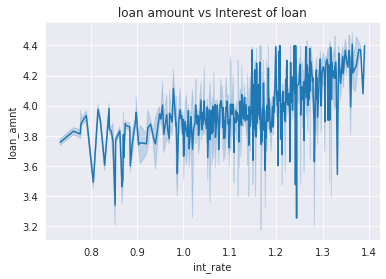

In [57]:
sns.lineplot(x=loan_data['int_rate'].apply(lambda x: np.log10(x)),y=loan_data['loan_amnt'].apply(lambda x: np.log10(x)))
plt.title(' loan amount vs Interest of loan ')
plt.show()

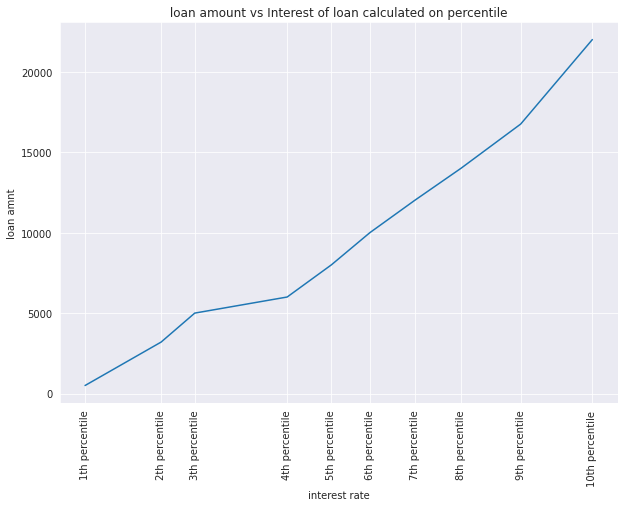

In [58]:
loan_percentile = list()
int_percentile = list()
loan_amnt = loan_data.loan_amnt.to_numpy()
int_rate = loan_data.int_rate.to_numpy()
for i in range(0,100,10):
  loan_percentile.append(np.percentile(loan_amnt,i))
  int_percentile.append(np.percentile(int_rate,i))
plt.figure(figsize=(10,7))
sns.lineplot(x=int_percentile,y=loan_percentile)
plt.xticks(int_percentile,labels=[str(i)+'th percentile' for i in list(np.arange(1,11,1))],rotation = 'vertical')
plt.xlabel('interest rate')
plt.ylabel('loan amnt')
plt.title(' loan amount vs Interest of loan calculated on percentile ')
plt.show()

**Observation**

From the above analysis we can conclude if the loan amount increased, the interest rate also increased.

And it has been observed that if the interest rate is increased, the chances of defaulter is also increased. 

So we can conclude the high loan amount can cause of high interest which will increase the chances of charged off loan.Again this is also retated with the term of loan

#**Feature Grade :**

LC assigned loan grade

**Finding Null values**

In [59]:
print('{}% value as empty for feature:grade'.format(round(((loan_data.grade.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:grade


**Number of data points in each category  of loan status**

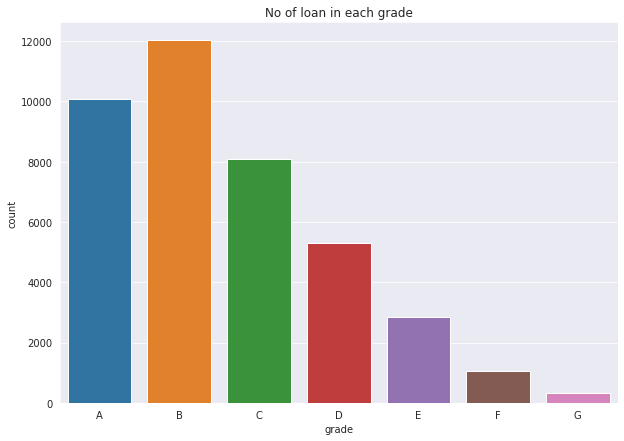

+-------+-------+
| index | grade |
+-------+-------+
|   B   | 12020 |
|   A   | 10085 |
|   C   |  8098 |
|   D   |  5307 |
|   E   |  2842 |
|   F   |  1049 |
|   G   |  316  |
+-------+-------+


In [60]:
plt.figure(figsize=(10,7))
sns.countplot(loan_data['grade'].sort_values(ascending=True))
plt.title('No of loan in each grade')

plt.show()
x = pd.DataFrame(loan_data['grade'].value_counts())
x.reset_index(inplace=True)

print(datadisplay(x))

**Observation**

Loan grading is a classification system which assign a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest.

The grades have been assigned alphabetically from A to G, as A being the highest-grade.

So From the above analysis, we can conclude most of the loans are high graded ( A and B graded) loans  

# Analysis between 'grade' and 'loan_amnt'

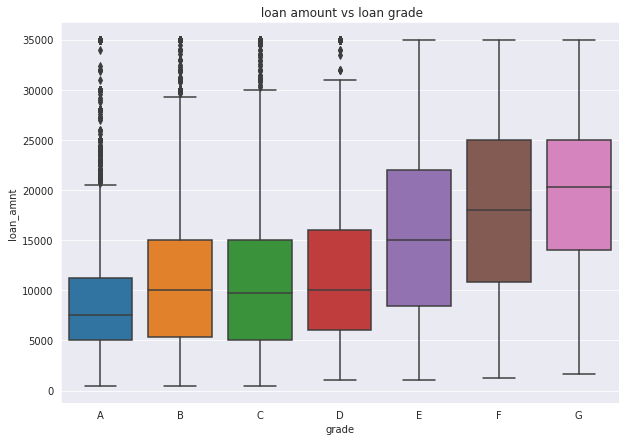

+-------+-----------+
| grade | loan_amnt |
+-------+-----------+
|   A   |  8624.93  |
|   B   |  11119.08 |
|   C   |  11004.67 |
|   D   |  12278.2  |
|   E   |  15847.26 |
|   F   |  18363.3  |
|   G   |  20226.82 |
+-------+-----------+


In [61]:
plt.figure(figsize=(10,7))
sns.boxplot(x=loan_data['grade'].sort_values(),y=loan_data['loan_amnt'])
plt.title(' loan amount vs loan grade')
plt.show()
x1=pd.DataFrame(loan_data.groupby(['grade']).loan_amnt.mean().round(2))
x1.reset_index(inplace=True)
print(datadisplay(x1))

**Observation**

The average loan amount sanctioned for the grade G is more than the others.For grade A loan , the loan amount is less than the others

# Analysis between 'grade' and 'int_rate'

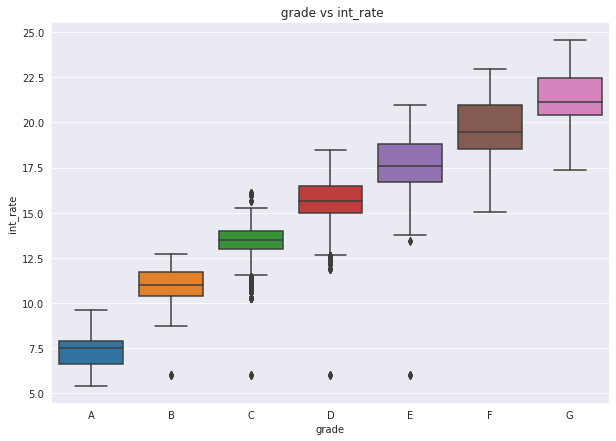

+-------+---------+-------+------+-------+-------+-------+-------+-------+
| grade |  count  |  mean | std  |  min  |  25%  |  50%  |  75%  |  max  |
+-------+---------+-------+------+-------+-------+-------+-------+-------+
|   A   | 10085.0 |  7.34 | 1.03 |  5.42 |  6.62 |  7.49 |  7.9  |  9.63 |
|   B   | 12020.0 | 11.02 | 0.9  |  6.0  | 10.37 | 10.99 | 11.71 | 12.69 |
|   C   |  8098.0 | 13.55 | 0.94 |  6.0  | 12.99 | 13.49 | 13.99 | 16.11 |
|   D   |  5307.0 | 15.72 | 1.18 |  6.0  | 14.96 | 15.65 | 16.49 | 18.49 |
|   E   |  2842.0 | 17.71 | 1.4  |  6.0  | 16.69 | 17.56 | 18.79 | 20.99 |
|   F   |  1049.0 | 19.75 | 1.48 | 15.01 | 18.54 | 19.47 | 20.99 | 22.94 |
|   G   |  316.0  |  21.4 | 1.34 | 17.34 |  20.4 | 21.14 | 22.48 | 24.59 |
+-------+---------+-------+------+-------+-------+-------+-------+-------+


In [62]:
plt.figure(figsize=(10,7))
sns.boxplot(x=loan_data['grade'].sort_values(),y=loan_data['int_rate'])
plt.title(' grade vs int_rate')
plt.show()
x=pd.DataFrame(loan_data.groupby(['grade']).int_rate.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

From the above analysis, we can conclude high graded loans are lowest-interest loan.

In [63]:
def percentage(x,y,loan_data):


  d = pd.DataFrame(loan_data.groupby([x,y])[y].count().unstack())
  d.fillna(0,inplace=True)
  d['Total_no_loan'] = d['Charged Off']+d['Current']+d['Fully Paid']
  d['charge-off %'] = ((d['Charged Off']/d['Total_no_loan'])*100).round(2)
  d['Current %'] = ((d['Current']/d['Total_no_loan'])*100).round(2)
  d['Fully Paid %'] = ((d['Fully Paid']/d['Total_no_loan'])*100).round(2)

  d1 = d[['charge-off %','Current %','Fully Paid %']].sort_values(by='charge-off %',ascending = False)

  d1.plot(kind='bar',stacked='True',figsize=(15,7))

  plt.show()
  d.reset_index(inplace=True)
  print(datadisplay(d.sort_values(by='charge-off %',ascending=False)))

# Analysis between 'grade' and 'loan_status'

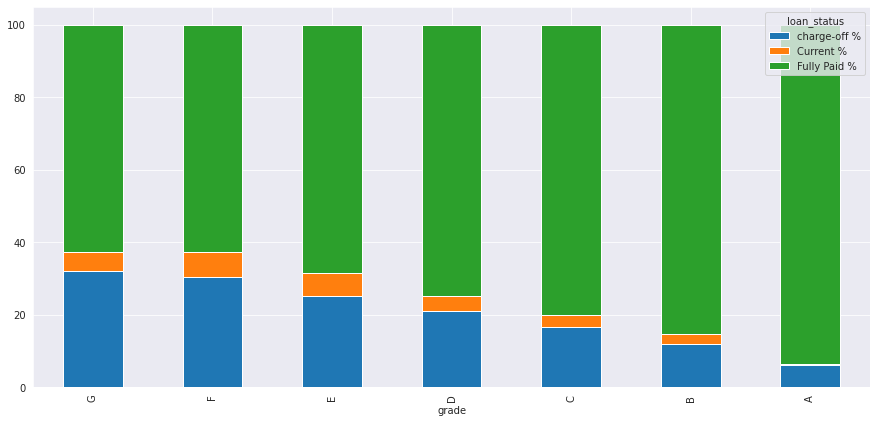

+-------+-------------+---------+------------+---------------+--------------+-----------+--------------+
| grade | Charged Off | Current | Fully Paid | Total_no_loan | charge-off % | Current % | Fully Paid % |
+-------+-------------+---------+------------+---------------+--------------+-----------+--------------+
|   G   |     101     |    17   |    198     |      316      |    31.96     |    5.38   |    62.66     |
|   F   |     319     |    73   |    657     |      1049     |    30.41     |    6.96   |    62.63     |
|   E   |     715     |   179   |    1948    |      2842     |    25.16     |    6.3    |    68.54     |
|   D   |     1118    |   222   |    3967    |      5307     |    21.07     |    4.18   |    74.75     |
|   C   |     1347    |   264   |    6487    |      8098     |    16.63     |    3.26   |    80.11     |
|   B   |     1425    |   345   |   10250    |     12020     |    11.86     |    2.87   |    85.27     |
|   A   |     602     |    40   |    9443    |     1008

In [64]:
percentage('grade','loan_status',loan_data)

**Observation**

Grade A loans are maximum fully recovered almost 93.63% and have very less chances to be charged off.

The chances of fully recovered is decreased with the grade from A to G

The loan amount of Grade G and F loans are comparatively  higher than the others and also the interest rate is high .From the above analysis we observed the recovery rate of Grade G and F loans are also less than others near about 62% and have very high chances to be charged off.So that we can conclude Grade G and F loans are very high risky loans


#**Feature sub-grade :**

LC assigned loan subgrade

#  Analysis between 'sub grade' and 'loan_status'

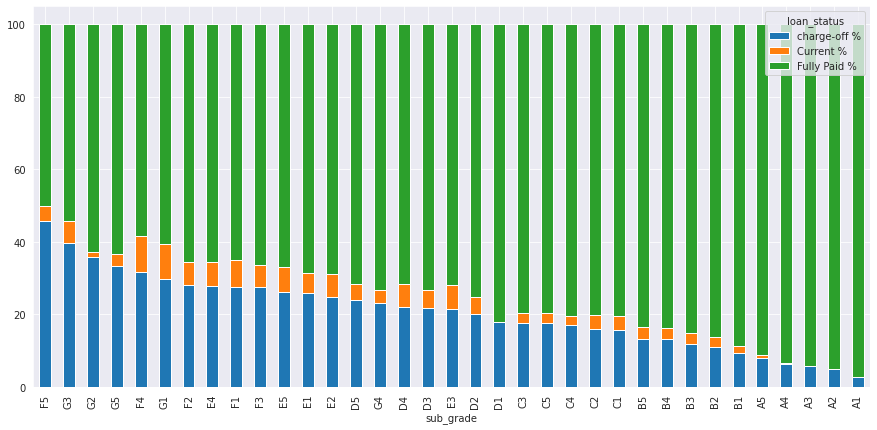

+-----------+-------------+---------+------------+---------------+--------------+-----------+--------------+
| sub_grade | Charged Off | Current | Fully Paid | Total_no_loan | charge-off % | Current % | Fully Paid % |
+-----------+-------------+---------+------------+---------------+--------------+-----------+--------------+
|     F5    |     54.0    |   5.0   |    59.0    |     118.0     |    45.76     |    4.24   |     50.0     |
|     G3    |     19.0    |   3.0   |    26.0    |      48.0     |    39.58     |    6.25   |    54.17     |
|     G2    |     28.0    |   1.0   |    49.0    |      78.0     |     35.9     |    1.28   |    62.82     |
|     G5    |     10.0    |   1.0   |    19.0    |      30.0     |    33.33     |    3.33   |    63.33     |
|     F4    |     53.0    |   17.0  |    98.0    |     168.0     |    31.55     |   10.12   |    58.33     |
|     G1    |     31.0    |   10.0  |    63.0    |     104.0     |    29.81     |    9.62   |    60.58     |
|     F2    |     7

In [65]:
percentage('sub_grade','loan_status',loan_data)

**Observation**

Percentage of charged off loans is highest for grade F and subgrade F5 and the maximum percent of charged off loans belong to grade F and G.Where as the percent of charged off loans are very less to Grade A compare to the others.

#**Feature emp_length :**

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

**Finding Null values**

In [66]:
print('{}% value as empty for feature:emp_length'.format(round(((loan_data.emp_length.isnull().sum()/loan_data.shape[0])*100),2)))

2.71% value as empty for feature:emp_length


In [67]:
loan_data.emp_length.fillna('Missimg',inplace=True)

**Number of data points in each category  of emp_length**

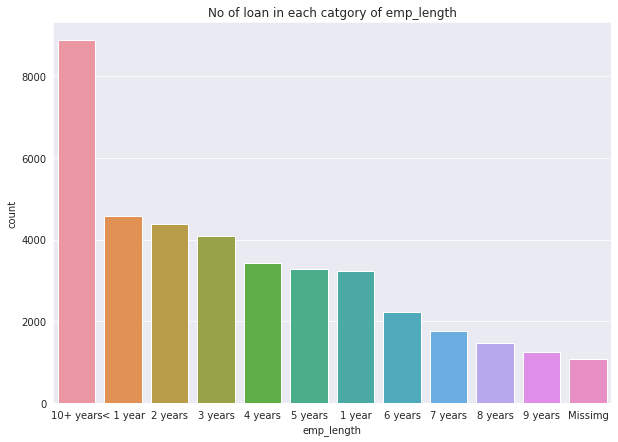

+-----------+------------+
|   index   | emp_length |
+-----------+------------+
| 10+ years |    8879    |
|  < 1 year |    4583    |
|  2 years  |    4388    |
|  3 years  |    4095    |
|  4 years  |    3436    |
|  5 years  |    3282    |
|   1 year  |    3240    |
|  6 years  |    2229    |
|  7 years  |    1773    |
|  8 years  |    1479    |
|  9 years  |    1258    |
|  Missimg  |    1075    |
+-----------+------------+


In [68]:
plt.figure(figsize=(10,7))
sns.countplot(loan_data.emp_length,order = loan_data.emp_length.value_counts().index)
plt.title('No of loan in each catgory of emp_length')
plt.show()

x=pd.DataFrame(loan_data['emp_length'].value_counts())
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

The persons who have experience more than 10 years took  maximum numbers of loan 

# Analysis between 'emp_length' and 'loan_amnt'

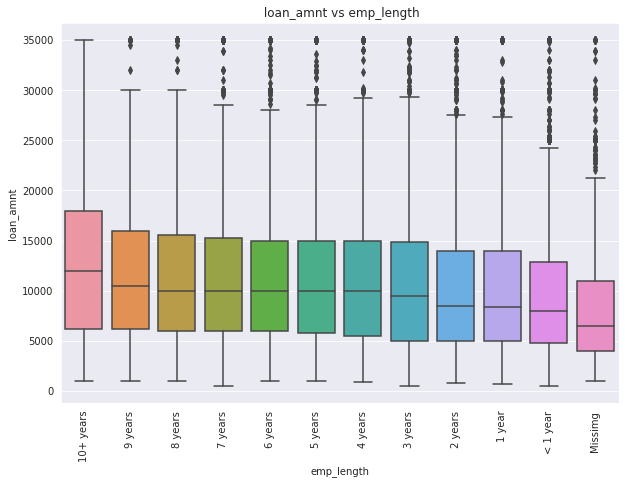

In [69]:
plt.figure(figsize=(10,7))
order_desc = loan_data.groupby('emp_length').loan_amnt.median().sort_values(ascending = False).index
sns.boxplot(loan_data.emp_length, loan_data.loan_amnt,order = order_desc)
plt.xticks(rotation= 'vertical')
plt.title(' loan_amnt vs emp_length')
plt.show()



**Observation**

The persons, who are having more than 10 years of working experience, are taking more loans and also the loan amount is high

# Analysis between 'emp_length' and 'loan_status'

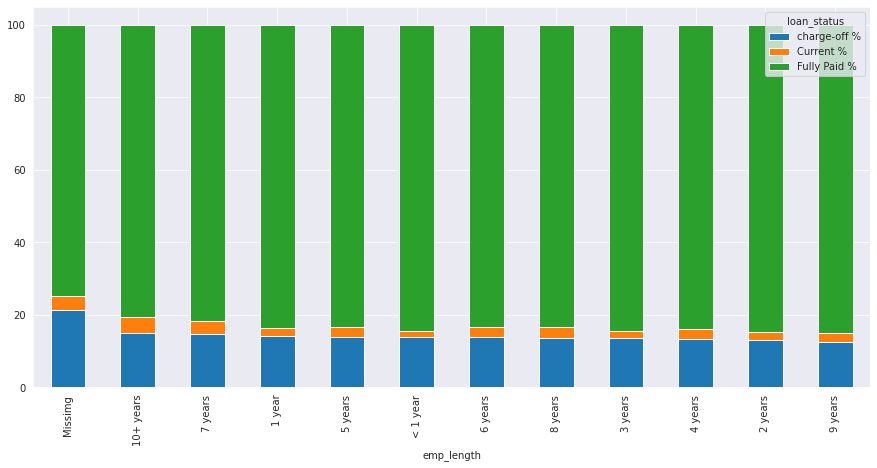

+------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
| emp_length | Charged Off | Current | Fully Paid | Total_no_loan | charge-off % | Current % | Fully Paid % |
+------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
|  Missimg   |     228     |    42   |    805     |      1075     |    21.21     |    3.91   |    74.88     |
| 10+ years  |     1331    |   391   |    7157    |      8879     |    14.99     |    4.4    |    80.61     |
|  7 years   |     263     |    62   |    1448    |      1773     |    14.83     |    3.5    |    81.67     |
|   1 year   |     456     |    71   |    2713    |      3240     |    14.07     |    2.19   |    83.73     |
|  5 years   |     458     |    88   |    2736    |      3282     |    13.95     |    2.68   |    83.36     |
|  < 1 year  |     639     |    75   |    3869    |      4583     |    13.94     |    1.64   |    84.42     |
|  6 years

In [70]:
percentage('emp_length','loan_status',loan_data)

**Observation**

The percentage of charged off loans is high for the persons, who are having more than 10 years of working experience, but the percentage of charged off loans is very less for the persons, who are having about 9 years of working experience. From the above analysis we can conclude,loan status is not directly dependent on employement length

#**Feature Annual_income :**

The self-reported annual income provided by the borrower during registration.

**Finding Null values**

In [71]:
print('{}% value as empty for feature:annual_inc'.format(round(((loan_data.annual_inc.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:annual_inc


In [72]:
loan_data.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

**Percentile analysis of annual_inc**

In [73]:
for i in range(0,101,10):
    print('{} percetile {}'.format(i,np.percentile(loan_data['annual_inc'],i)))

0 percetile 4000.0
10 percetile 30000.0
20 percetile 37500.0
30 percetile 45000.0
40 percetile 50400.0
50 percetile 59000.0
60 percetile 65844.39999999997
70 percetile 75600.0
80 percetile 90000.0
90 percetile 116000.0
100 percetile 6000000.0


In [74]:
for i in range(90,101,1):
    print('{} percetile {}'.format(i,np.percentile(loan_data['annual_inc'],i)))

90 percetile 116000.0
91 percetile 120000.0
92 percetile 123000.0
93 percetile 128371.8000000011
94 percetile 135000.0
95 percetile 142000.0
96 percetile 150000.0
97 percetile 165757.9199999984
98 percetile 187000.0
99 percetile 234999.36
100 percetile 6000000.0


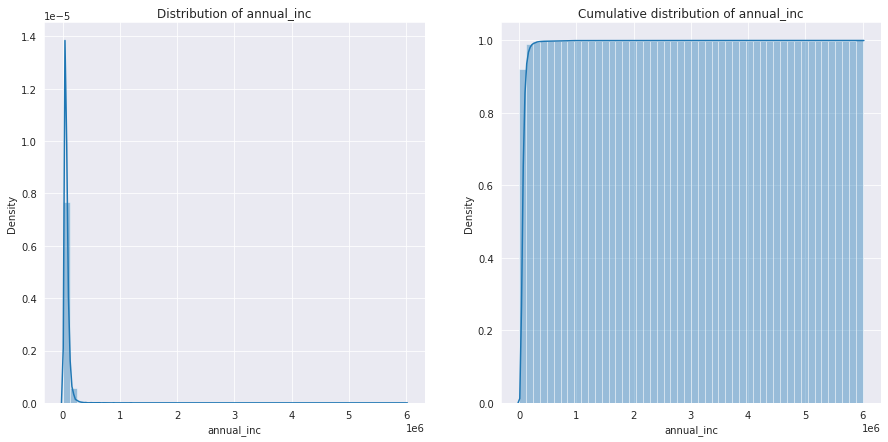

In [75]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.distplot(loan_data.annual_inc,ax= axes[0])
axes[0].set_title('Distribution of annual_inc')

kwargs = {'cumulative': True}
sns.distplot(loan_data['annual_inc'],hist_kws=kwargs, kde_kws=kwargs,ax= axes[1])
axes[1].set_title('Cumulative distribution of annual_inc')
plt.show()

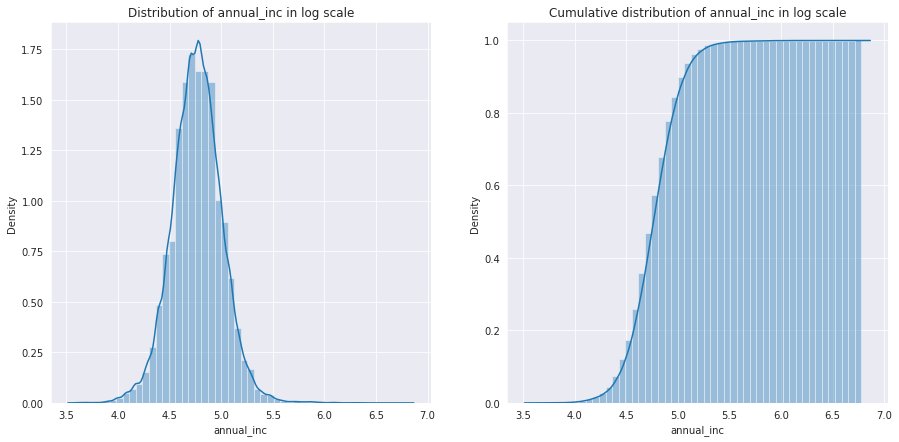

In [76]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.distplot(loan_data.annual_inc.apply(lambda x: np.log10(x) if x> 0 else np.log10(x+1)),ax= axes[0])
axes[0].set_title('Distribution of annual_inc in log scale')

kwargs = {'cumulative': True}
sns.distplot(loan_data['annual_inc'].apply(lambda x: np.log10(x) if x> 0 else np.log10(x+1))\
             ,hist_kws=kwargs, kde_kws=kwargs,ax= axes[1])
axes[1].set_title('Cumulative distribution of annual_inc in log scale')
plt.show()

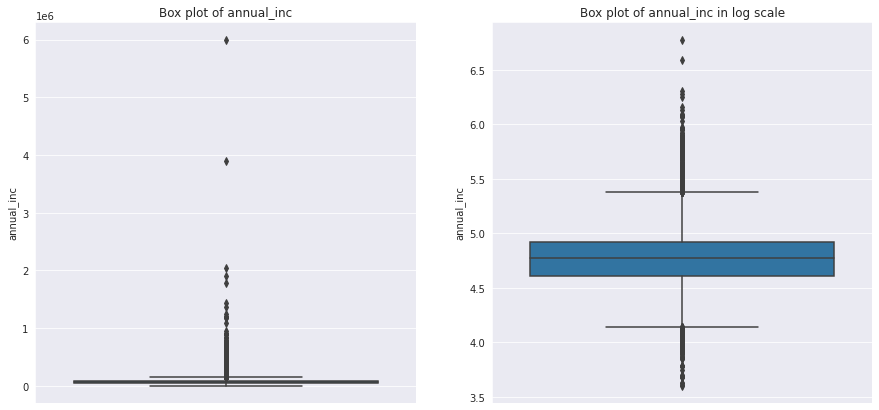

In [77]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
sns.boxplot(y= loan_data.annual_inc,ax = axes[0])
axes[0].set_title('Box plot of annual_inc')
sns.boxplot(y=loan_data.annual_inc.apply(lambda x: np.log10(x) if x> 0 else np.log10(x+1)),ax= axes[1])
axes[1].set_title('Box plot of annual_inc in log scale')
plt.show()

**Observation**

The self-reported annual income provided by the borrower is following power_law distribution.90% borrowers's annual income is less or equal to 116000.0.Very less persons have annual income more than 120000.0

# Analysis between 'annual_inc' and 'loan_status'

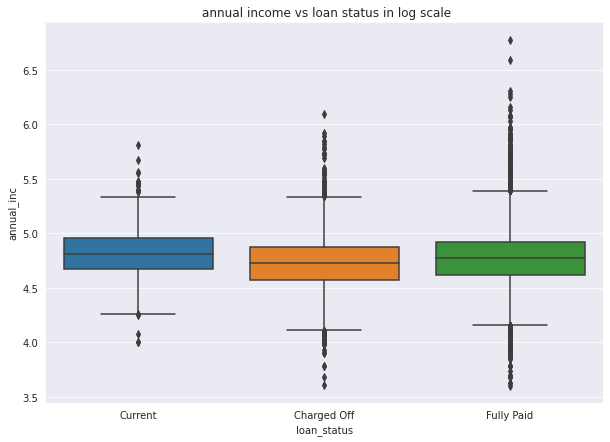

+-------------+---------+----------+----------+--------+----------+---------+---------+-----------+
| loan_status |  count  |   mean   |   std    |  min   |   25%    |   50%   |   75%   |    max    |
+-------------+---------+----------+----------+--------+----------+---------+---------+-----------+
| Charged Off |  5627.0 | 62427.3  | 47776.01 | 4080.0 | 37000.0  | 53000.0 | 75000.0 | 1250000.0 |
|   Current   |  1140.0 | 75430.67 | 46775.43 | 9960.0 | 47475.0  | 65000.0 | 90000.0 |  650000.0 |
|  Fully Paid | 32950.0 | 69862.5  | 66562.25 | 4000.0 | 41132.75 | 60000.0 | 84000.0 | 6000000.0 |
+-------------+---------+----------+----------+--------+----------+---------+---------+-----------+


In [78]:
plt.figure(figsize=(10,7))
order_desc = loan_data.groupby('loan_status').int_rate.median().sort_values(ascending = False).index
sns.boxplot(x= loan_data.loan_status, y = loan_data.annual_inc.apply(lambda x: np.log10(x)),order = order_desc)
plt.title(' annual income vs loan status in log scale')
plt.show()
x = pd.DataFrame(loan_data.groupby('loan_status').annual_inc.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

From the above analysis we can conclude, in case of charged off loan borrower's avg annual income is little less which is not much significant.

#**Feature fund_Amnt:**

The total amount committed to that loan at that point in time.

**Finding Null values**

In [79]:
print('{}% value as empty for feature:fund_Amnt'.format(round(((loan_data.funded_amnt.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:fund_Amnt


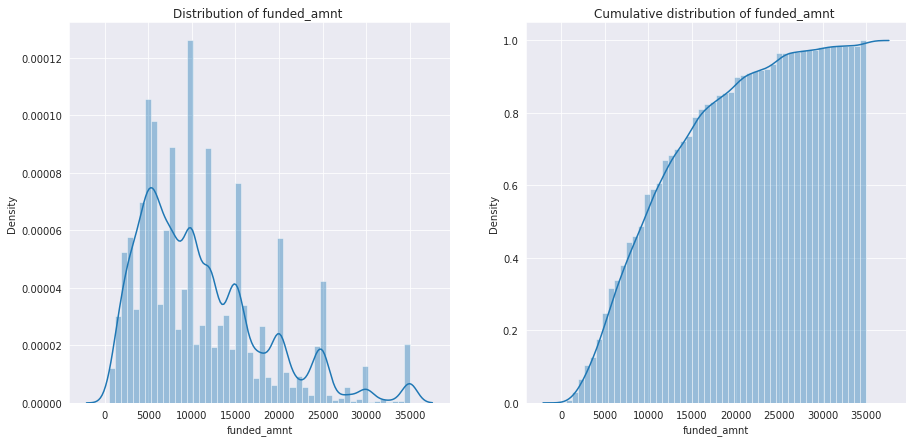

In [80]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.distplot(loan_data.funded_amnt,ax= axes[0])
axes[0].set_title('Distribution of funded_amnt ')

kwargs = {'cumulative': True}
sns.distplot(loan_data['funded_amnt'],hist_kws=kwargs, kde_kws=kwargs,ax= axes[1])
axes[1].set_title('Cumulative distribution of funded_amnt ')
plt.show()

**Observation**

The distribution is very much similar to loan amount

In [81]:
loan_data.funded_amnt.describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

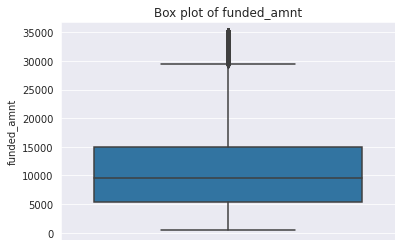

In [82]:
sns.boxplot(y= loan_data.funded_amnt)
plt.title('Box plot of funded_amnt')
plt.show()

# Analysis between 'funded_amnt' and 'loan_status'

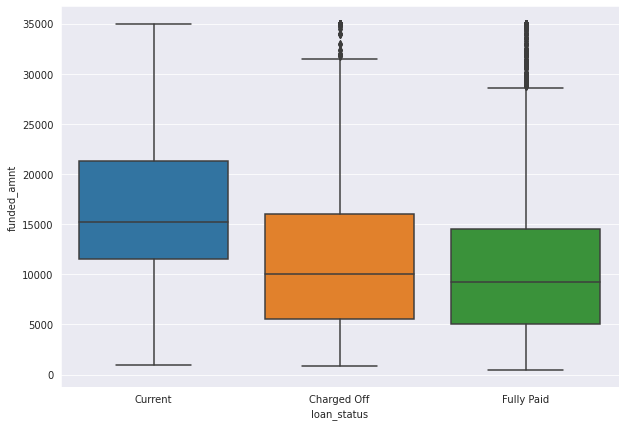

+-------------+---------+----------+---------+--------+---------+---------+----------+---------+
| loan_status |  count  |   mean   |   std   |  min   |   25%   |   50%   |   75%    |   max   |
+-------------+---------+----------+---------+--------+---------+---------+----------+---------+
| Charged Off |  5627.0 | 11753.4  | 7760.52 | 900.0  |  5575.0 | 10000.0 | 16000.0  | 35000.0 |
|   Current   |  1140.0 | 16485.7  | 8183.57 | 1000.0 | 11575.0 | 15225.0 | 21281.25 | 35000.0 |
|  Fully Paid | 32950.0 | 10618.52 | 6956.05 | 500.0  |  5050.0 |  9200.0 | 14500.0  | 35000.0 |
+-------------+---------+----------+---------+--------+---------+---------+----------+---------+


In [83]:
plt.figure(figsize=(10,7))
order_desc = loan_data.groupby('loan_status').funded_amnt.median().sort_values(ascending = False).index
sns.boxplot(y= loan_data.funded_amnt, x= loan_data.loan_status,order = order_desc)
plt.show()
x = pd.DataFrame(loan_data.groupby('loan_status').funded_amnt.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

Funded amount is the total amount committed by investors for that loan at that point in time which is right skewed in nature.

The possibility of defaulters is more if Funded amount is high though there are many factors on which the lone status is dependent

# Analysis between 'funded_amnt' and 'loan_status'

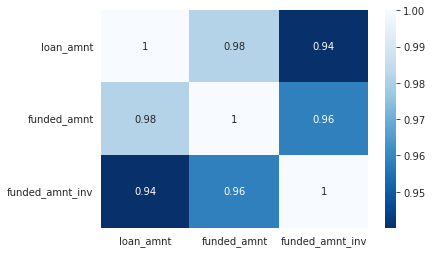

In [84]:
sns.heatmap(loan_data[['loan_amnt','funded_amnt','funded_amnt_inv']].corr(),annot=True,cmap='Blues_r')
plt.show()

**Observation**

From the above analysis we can observe the funded_amnt and funded_amnt_inv is highly correlated with loan_amnt. so we can drop both the features.

In [85]:
loan_data=loan_data.drop(['funded_amnt','funded_amnt_inv'],axis=1)

In [86]:
loan_data.shape

(39717, 41)

# **Feature terms :**

The number of payments on the loan. Values are in months and can be either 36 or 60.


**Finding Null values**

In [87]:
print('{}% value as empty for feature:terms'.format(round(((loan_data.term.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:terms


**Number of loan in each catgory of term**

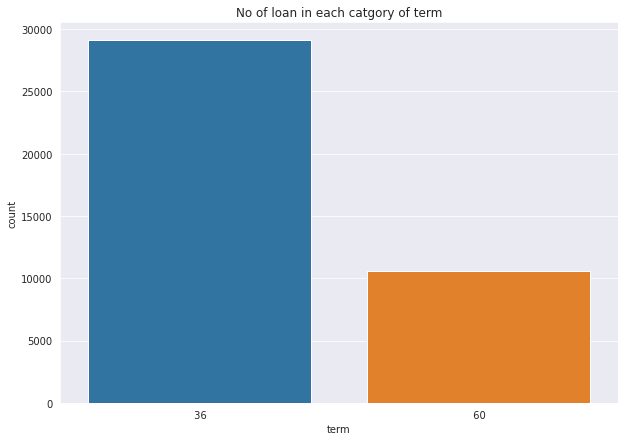

+-------+-------+
| index |  term |
+-------+-------+
|   36  | 29096 |
|   60  | 10621 |
+-------+-------+


In [88]:
plt.figure(figsize=(10,7))
sns.countplot(loan_data.term)
plt.title('No of loan in each catgory of term')
plt.show()

x=pd.DataFrame(loan_data['term'].value_counts())
x.reset_index(inplace=True)
print(datadisplay(x))





**The percentage of loan sanctioned for both the term**

In [89]:
df_term = pd.DataFrame((loan_data['term'].value_counts()/loan_data['term'].shape[0]*100).round(2))
df_term.reset_index(inplace = True)
df_term.rename(columns = {'index':'term','term':'percentage(%)'},inplace= True)
print(datadisplay(df_term))

+------+---------------+
| term | percentage(%) |
+------+---------------+
|  36  |     73.26     |
|  60  |     26.74     |
+------+---------------+


**Observation**

Maximum loans are given for duration of 36 months which is around 73%  while just 27% of the loans are given duration of 60 months.

# Analysis between 'term' and 'loan_amnt'

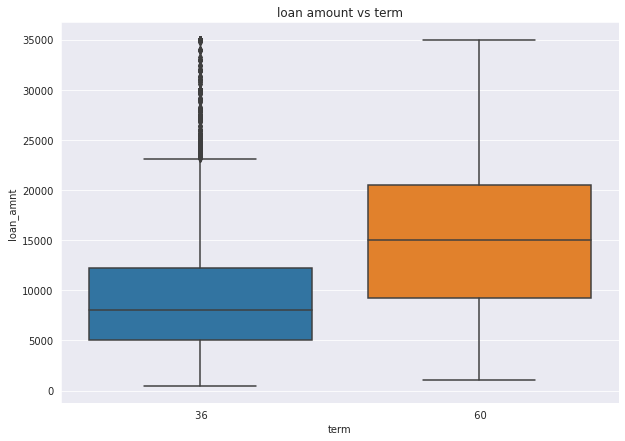

+------+---------+----------+---------+--------+--------+---------+---------+---------+
| term |  count  |   mean   |   std   |  min   |  25%   |   50%   |   75%   |   max   |
+------+---------+----------+---------+--------+--------+---------+---------+---------+
|  36  | 29096.0 | 9592.94  | 6323.25 | 500.0  | 5000.0 |  8000.0 | 12250.0 | 35000.0 |
|  60  | 10621.0 | 15675.23 | 8443.47 | 1000.0 | 9250.0 | 15000.0 | 20500.0 | 35000.0 |
+------+---------+----------+---------+--------+--------+---------+---------+---------+


In [90]:
plt.figure(figsize=(10,7))
sns.boxplot(x = loan_data.term, y= loan_data.loan_amnt)
plt.title('loan amount vs term')
plt.show()

x = pd.DataFrame(loan_data.groupby('term').loan_amnt.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x))


**Observation**

The avg loan amount sanction for the term of 36 month is less than the avg loan amount sanction for the term of 60 month

# Analysis between 'term' and 'int_rate'

---



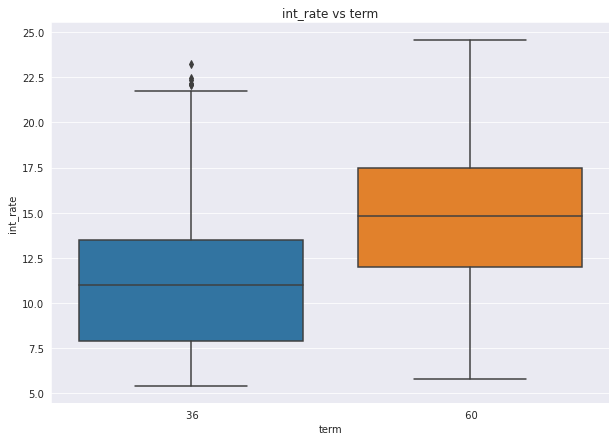

+------+---------+-------+------+------+-------+-------+-------+-------+
| term |  count  |  mean | std  | min  |  25%  |  50%  |  75%  |  max  |
+------+---------+-------+------+------+-------+-------+-------+-------+
|  36  | 29096.0 |  11.0 | 3.23 | 5.42 |  7.9  | 10.99 | 13.47 | 23.22 |
|  60  | 10621.0 | 14.81 | 3.56 | 5.79 | 11.99 | 14.83 | 17.49 | 24.59 |
+------+---------+-------+------+------+-------+-------+-------+-------+


In [91]:
plt.figure(figsize=(10,7))
sns.boxplot(x = loan_data.term, y= loan_data.int_rate)
plt.title('int_rate vs term')
plt.show()

x = pd.DataFrame(loan_data.groupby('term').int_rate.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

Interest rate is high if the duration of term is more

# Analysis between 'term' and 'loan_status'

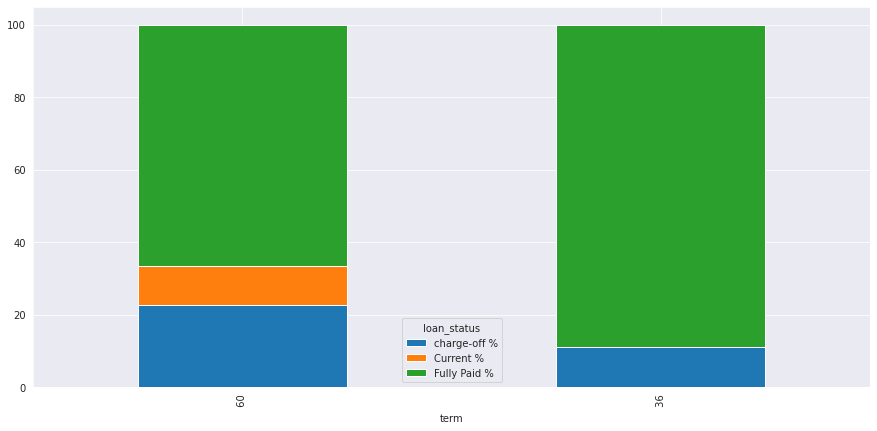

+------+-------------+---------+------------+---------------+--------------+-----------+--------------+
| term | Charged Off | Current | Fully Paid | Total_no_loan | charge-off % | Current % | Fully Paid % |
+------+-------------+---------+------------+---------------+--------------+-----------+--------------+
|  60  |    2400.0   |  1140.0 |   7081.0   |    10621.0    |     22.6     |   10.73   |    66.67     |
|  36  |    3227.0   |   0.0   |  25869.0   |    29096.0    |    11.09     |    0.0    |    88.91     |
+------+-------------+---------+------------+---------------+--------------+-----------+--------------+


In [92]:
percentage('term','loan_status',loan_data)

**Observation**

The possibility of charged off loans is increased if the duration of the loan is increased

# **Feature installment :**

The monthly payment owed by the borrower if the loan originates.

**Finding Null values**

In [93]:
print('{}% value as empty for feature:installment'.format(round(((loan_data.installment.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:installment


In [94]:
loan_data.installment.describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

**Percentile analysis of installment**

In [95]:
for i in range(0,101,10):
    print('{} percetile {}'.format(i,np.percentile(loan_data['installment'],i)))

0 percetile 15.69
10 percetile 99.45
20 percetile 150.8
30 percetile 187.08000000000004
40 percetile 231.37
50 percetile 280.22
60 percetile 330.64199999999994
70 percetile 389.36
80 percetile 483.38
90 percetile 622.9520000000001
100 percetile 1305.19


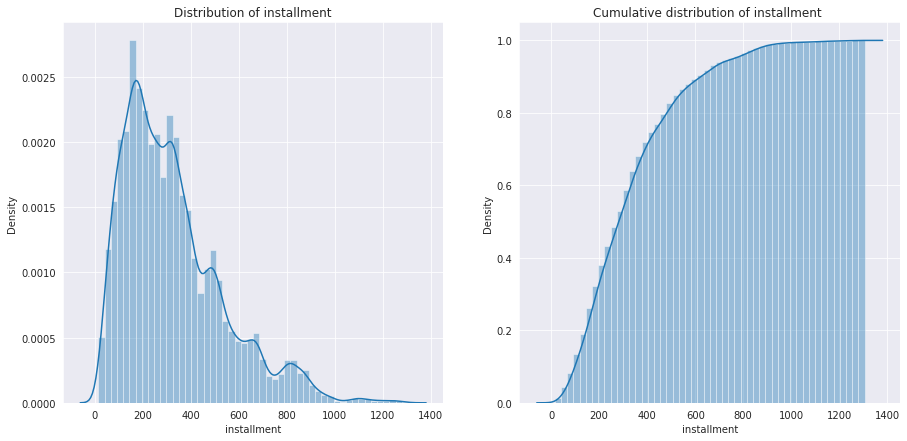

In [96]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.distplot(loan_data.installment,ax= axes[0])
axes[0].set_title('Distribution of installment')

kwargs = {'cumulative': True}
sns.distplot(loan_data['installment'],hist_kws=kwargs, kde_kws=kwargs,ax= axes[1])
axes[1].set_title('Cumulative distribution of installment ')
plt.show()

**Observation**

Most of the persons are paying monthly less than 600.Very few person are paying more than 1000 per month

# Analysis between 'installment' and 'loan_status'

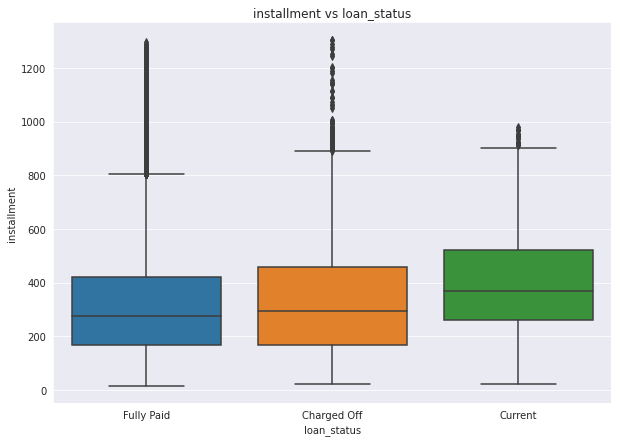

+-------------+---------+--------+--------+-------+--------+--------+--------+---------+
| loan_status |  count  |  mean  |  std   |  min  |  25%   |  50%   |  75%   |   max   |
+-------------+---------+--------+--------+-------+--------+--------+--------+---------+
| Charged Off |  5627.0 | 336.18 | 217.05 | 22.79 | 168.56 | 293.87 | 457.84 | 1305.19 |
|   Current   |  1140.0 | 395.48 | 204.49 | 21.74 | 258.47 | 368.19 | 519.72 |  981.45 |
|  Fully Paid | 32950.0 | 320.13 | 207.08 | 15.69 | 165.28 | 275.65 | 420.74 | 1295.21 |
+-------------+---------+--------+--------+-------+--------+--------+--------+---------+


In [97]:
plt.figure(figsize=(10,7))
sns.boxplot(x= loan_data.loan_status, y= loan_data.installment)
plt.title('installment vs loan_status')
plt.show()

x = pd.DataFrame(loan_data.groupby('loan_status').installment.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

The persons ,who are paying high installment per month ,have a high probability to become defaulters

# Analysis between 'installment' ,'loan_status' and 'term'

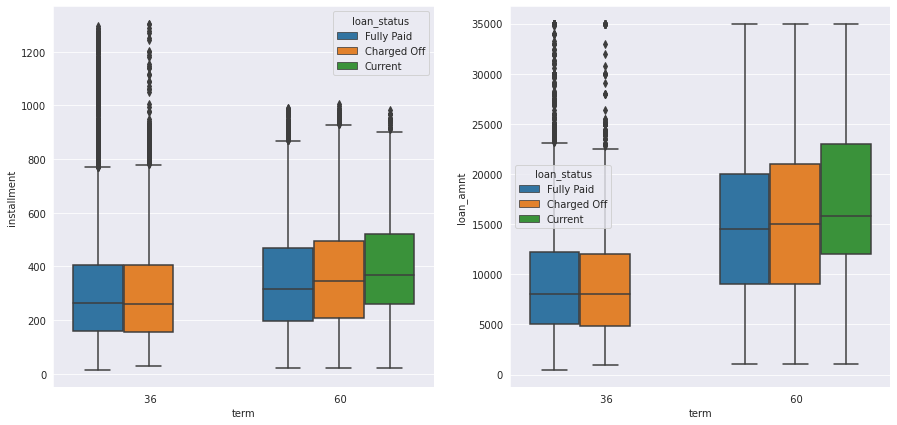

In [98]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x= loan_data.term, y= loan_data.installment,hue=loan_data.loan_status,ax=axes[0])
sns.boxplot(x = loan_data.term, y= loan_data.loan_amnt,hue=loan_data.loan_status,ax=axes[1])
plt.show()

**Observation**

If the loan amount is large and it has been taken for long duration then the installment paid by per month is also high. In such case there is a high risk to be defaulter

# **Feature home_ownership :**

The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

**Finding Null values**

In [99]:
print('{}% value as empty for feature:home_ownership'.format(round(((loan_data.home_ownership.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:home_ownership


**Number of loan in each catgory of home_ownership**

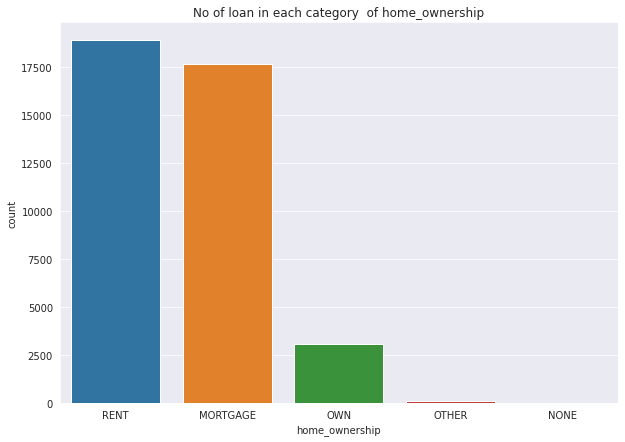

+----------+----------------+
|  index   | home_ownership |
+----------+----------------+
|   RENT   |     18899      |
| MORTGAGE |     17659      |
|   OWN    |      3058      |
|  OTHER   |       98       |
|   NONE   |       3        |
+----------+----------------+


In [100]:
plt.figure(figsize=(10,7))
sns.countplot(loan_data.home_ownership,order=loan_data.home_ownership.value_counts().index)
plt.title('No of loan in each category  of home_ownership')
plt.show()

x=pd.DataFrame(loan_data['home_ownership'].value_counts())
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

The loan taken by the borrowers who are staying in rented house is maximum

# Analysis between 'home_ownership' ,'loan_status' 

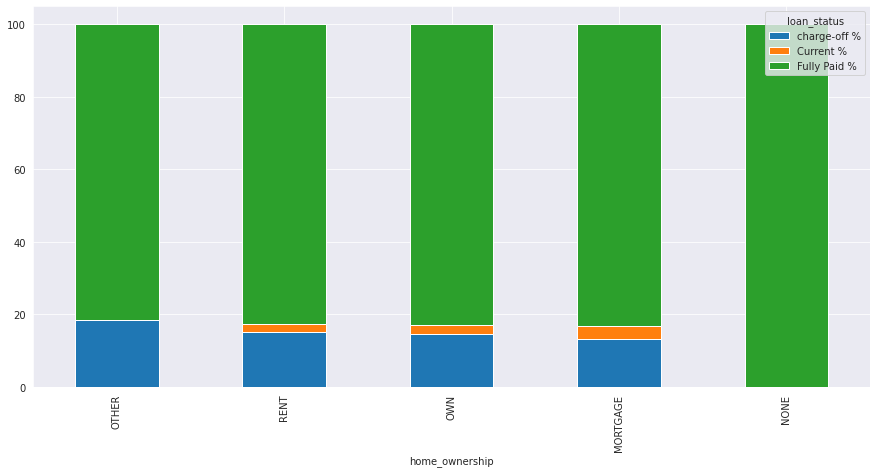

+----------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
| home_ownership | Charged Off | Current | Fully Paid | Total_no_loan | charge-off % | Current % | Fully Paid % |
+----------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
|     OTHER      |     18.0    |   0.0   |    80.0    |      98.0     |    18.37     |    0.0    |    81.63     |
|      RENT      |    2839.0   |  419.0  |  15641.0   |    18899.0    |    15.02     |    2.22   |    82.76     |
|      OWN       |    443.0    |   83.0  |   2532.0   |     3058.0    |    14.49     |    2.71   |     82.8     |
|    MORTGAGE    |    2327.0   |  638.0  |  14694.0   |    17659.0    |    13.18     |    3.61   |    83.21     |
|      NONE      |     0.0     |   0.0   |    3.0     |      3.0      |     0.0      |    0.0    |    100.0     |
+----------------+-------------+---------+------------+---------------+--------------+--

In [101]:
percentage('home_ownership','loan_status',loan_data)

**Observation**

The persons who are staying in rented house are taking maximum loan and they have a high possibility  to become defaulter


# **Feature verification_status :**

Indicates if income was verified by LC, not verified, or if the income source was verified

**Finding Null values**

In [102]:
print('{}% value as empty for feature:verification_status'.format(round(((loan_data.verification_status.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:verification_status


**Number of loan in each catgory of verification_status**

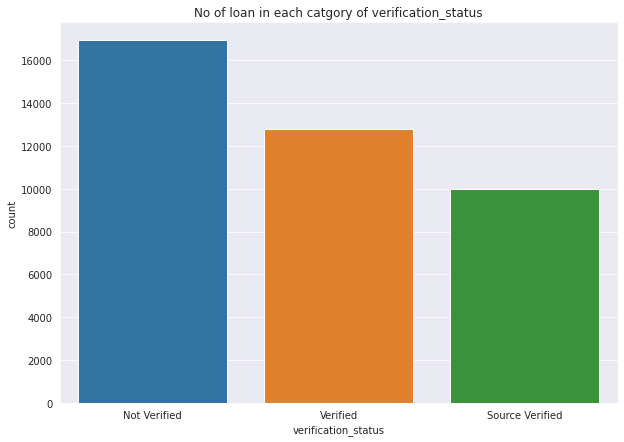

+-----------------+---------------------+
|      index      | verification_status |
+-----------------+---------------------+
|   Not Verified  |        16921        |
|     Verified    |        12809        |
| Source Verified |         9987        |
+-----------------+---------------------+


In [103]:
plt.figure(figsize=(10,7))
sns.countplot(loan_data.verification_status,order=loan_data.verification_status.value_counts().index)
plt.title('No of loan in each catgory of verification_status')
plt.show()

x=pd.DataFrame(loan_data['verification_status'].value_counts())
x.reset_index(inplace=True)
print(datadisplay(x))

# Analysis between 'verification_status' ,'loan_status' and 'loan_amnt'

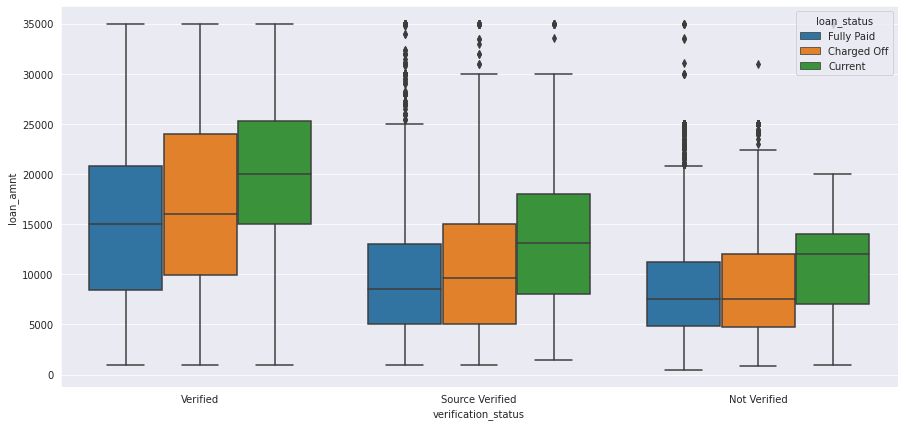

In [104]:
plt.figure(figsize=(15,7))
sns.boxplot(x= loan_data.verification_status, y= loan_data.loan_amnt,hue=loan_data.loan_status)
plt.show()

**Observation**

The loan of high amount mostly verified loan but still the chances to be charged off is high which is unusual

# Analysis between 'verification_status' ,'loan_status'

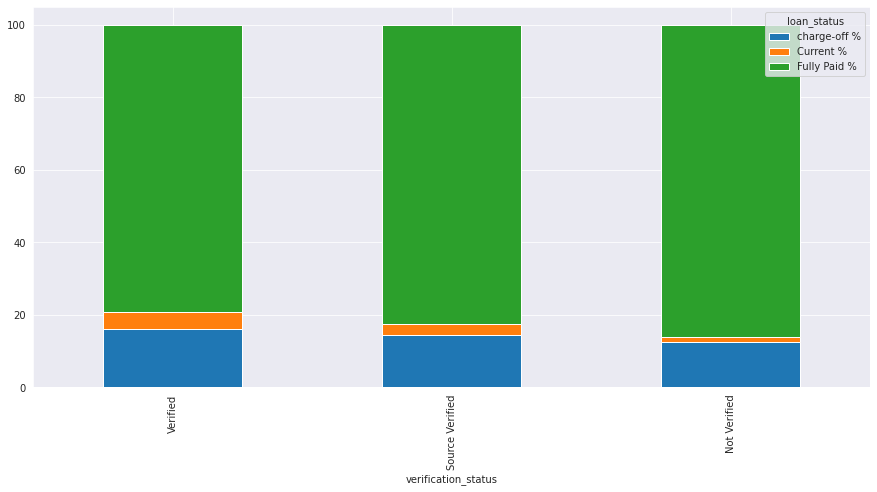

+---------------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
| verification_status | Charged Off | Current | Fully Paid | Total_no_loan | charge-off % | Current % | Fully Paid % |
+---------------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
|       Verified      |     2051    |   603   |   10155    |     12809     |    16.01     |    4.71   |    79.28     |
|   Source Verified   |     1434    |   310   |    8243    |      9987     |    14.36     |    3.1    |    82.54     |
|     Not Verified    |     2142    |   227   |   14552    |     16921     |    12.66     |    1.34   |     86.0     |
+---------------------+-------------+---------+------------+---------------+--------------+-----------+--------------+


In [105]:
percentage('verification_status','loan_status',loan_data)



**Observation**

The number of Non verified loan is more than the number of verified and source varified loans by LC .

And also we can see the percentage of charged off loan is more in case of verified and sorce varified loans than non varified loan which is also unexpected

# **Feature purpose :**

A category provided by the borrower for the loan request. 

**Finding Null values**

In [106]:
print('{}% value as empty for feature:purpose'.format(round(((loan_data.purpose.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:purpose


**Number of loan in each catgory of purpose**

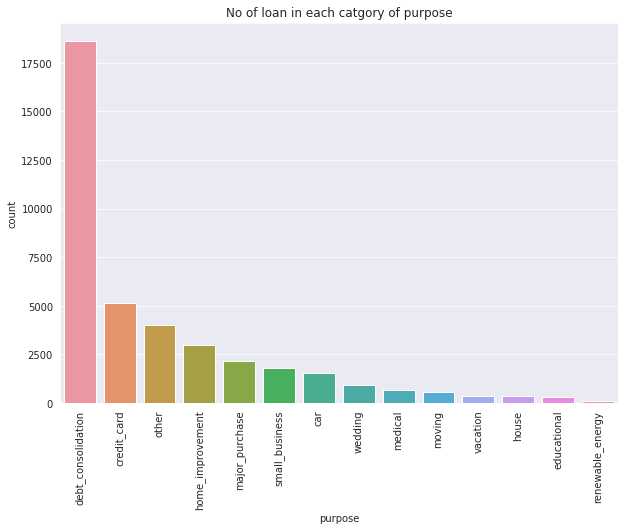

+--------------------+---------+
|       index        | purpose |
+--------------------+---------+
| debt_consolidation |  18641  |
|    credit_card     |   5130  |
|       other        |   3993  |
|  home_improvement  |   2976  |
|   major_purchase   |   2187  |
|   small_business   |   1828  |
|        car         |   1549  |
|      wedding       |   947   |
|      medical       |   693   |
|       moving       |   583   |
|      vacation      |   381   |
|       house        |   381   |
|    educational     |   325   |
|  renewable_energy  |   103   |
+--------------------+---------+


In [107]:
plt.figure(figsize=(10,7))
sns.countplot(loan_data.purpose,order=loan_data.purpose.value_counts().index)
plt.title('No of loan in each catgory of purpose')
plt.xticks(rotation='vertical')
plt.show()

x=pd.DataFrame(loan_data['purpose'].value_counts())
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

The maximum loans are issued for the purpose of dept consolidation.

# Analysis between 'purpose' ,'loan_status' and 'loan_amnt'

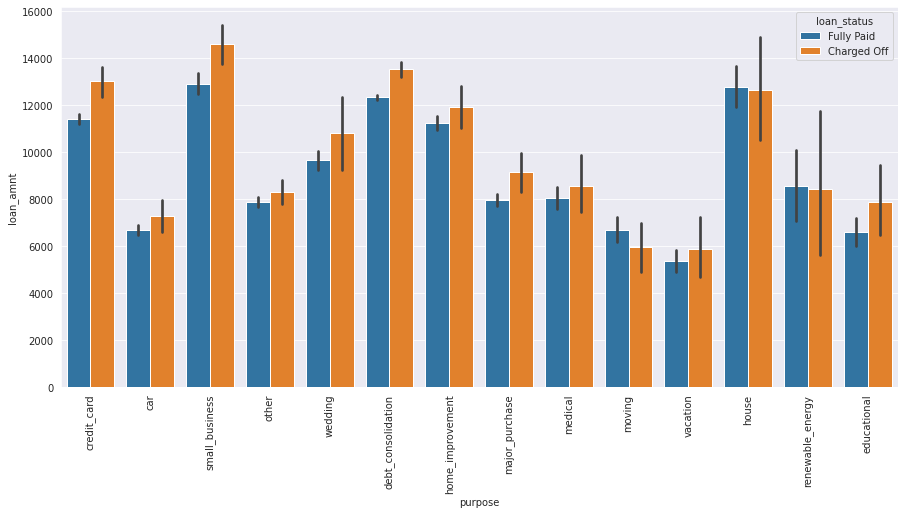

+--------------------+---------+----------+---------+--------+--------+---------+---------+---------+
|      purpose       |  count  |   mean   |   std   |  min   |  25%   |   50%   |   75%   |   max   |
+--------------------+---------+----------+---------+--------+--------+---------+---------+---------+
|      vacation      |  381.0  | 5463.32  |  4338.2 | 500.0  | 2500.0 |  4800.0 |  7000.0 | 29700.0 |
|       moving       |  583.0  | 6650.17  |  5797.8 | 1000.0 | 3000.0 |  5000.0 |  8000.0 | 35000.0 |
|        car         |  1549.0 | 6777.52  | 4106.82 | 1000.0 | 4000.0 |  6000.0 |  8500.0 | 32000.0 |
|    educational     |  325.0  | 6810.46  | 5141.44 | 900.0  | 3000.0 |  5400.0 |  9500.0 | 25000.0 |
|       other        |  3993.0 | 8067.61  | 6421.72 | 500.0  | 3500.0 |  6000.0 | 10000.0 | 35000.0 |
|   major_purchase   |  2187.0 | 8155.43  | 6125.92 | 1000.0 | 4000.0 |  6000.0 | 10000.0 | 35000.0 |
|      medical       |  693.0  | 8263.67  | 6119.47 | 1000.0 | 4000.0 |  6000.0 | 

In [108]:
plt.figure(figsize=(15,7))
sns.barplot(x= loan_data[~(loan_data['loan_status']=='Current')].purpose, y= loan_data[~(loan_data['loan_status']=='Current')].loan_amnt,hue=loan_data[~(loan_data['loan_status']=='Current')].loan_status,estimator=np.mean)
plt.xticks(rotation='vertical')
plt.show()

x=pd.DataFrame(loan_data.groupby(['purpose']).loan_amnt.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x.sort_values(by='mean')))


**Observation**

The loan of high amount are mostly taken by small_business and the chances to be charged off is also high

# Analysis between 'purpose' ,'loan_status'

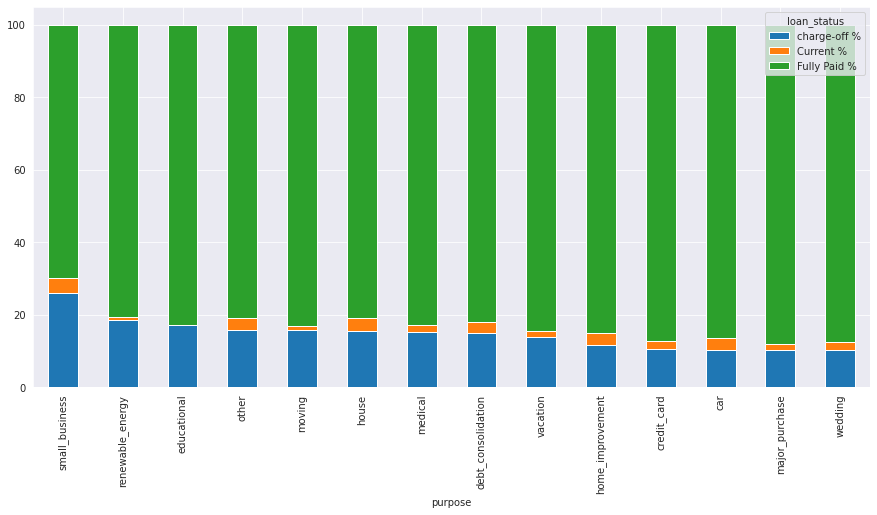

+--------------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
|      purpose       | Charged Off | Current | Fully Paid | Total_no_loan | charge-off % | Current % | Fully Paid % |
+--------------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
|   small_business   |    475.0    |   74.0  |   1279.0   |     1828.0    |    25.98     |    4.05   |    69.97     |
|  renewable_energy  |     19.0    |   1.0   |    83.0    |     103.0     |    18.45     |    0.97   |    80.58     |
|    educational     |     56.0    |   0.0   |   269.0    |     325.0     |    17.23     |    0.0    |    82.77     |
|       other        |    633.0    |  128.0  |   3232.0   |     3993.0    |    15.85     |    3.21   |    80.94     |
|       moving       |     92.0    |   7.0   |   484.0    |     583.0     |    15.78     |    1.2    |    83.02     |
|       house        |     59.0    |   14.0  |   308.0  

In [109]:
percentage('purpose','loan_status',loan_data)



**Observation**

The loan give for small_business purpose have the maximum possibility to become charged off

# **Feature addr_state :**

The maximum loans are issued for the purpose of dept consolidation.

**Finding Null values**

In [110]:
print('{}% value as empty for feature:addr_state'.format(round(((loan_data.addr_state.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:addr_state


**Number of loan in each catgory of addr_state**

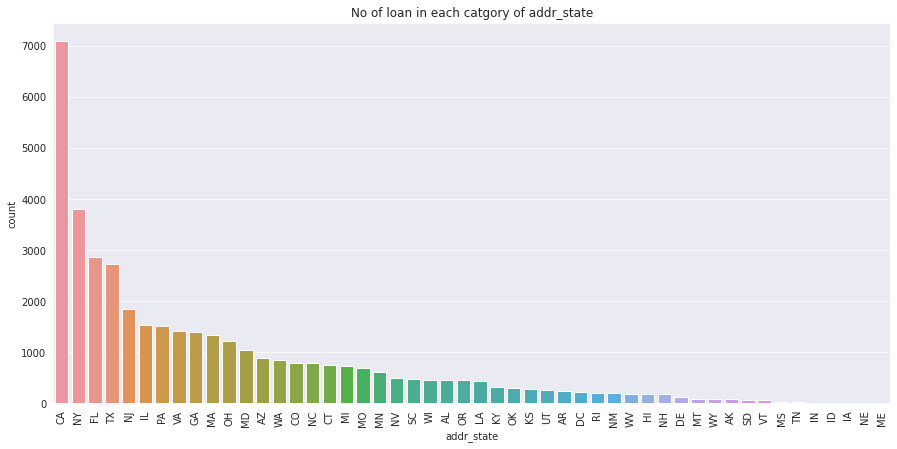

+-------+------------+
| index | addr_state |
+-------+------------+
|   CA  |    7099    |
|   NY  |    3812    |
|   FL  |    2866    |
|   TX  |    2727    |
|   NJ  |    1850    |
|   IL  |    1525    |
|   PA  |    1517    |
|   VA  |    1407    |
|   GA  |    1398    |
|   MA  |    1340    |
|   OH  |    1223    |
|   MD  |    1049    |
|   AZ  |    879     |
|   WA  |    840     |
|   CO  |    792     |
|   NC  |    788     |
|   CT  |    751     |
|   MI  |    720     |
|   MO  |    686     |
|   MN  |    615     |
|   NV  |    497     |
|   SC  |    472     |
|   WI  |    460     |
|   AL  |    452     |
|   OR  |    451     |
|   LA  |    436     |
|   KY  |    325     |
|   OK  |    299     |
|   KS  |    271     |
|   UT  |    258     |
|   AR  |    245     |
|   DC  |    214     |
|   RI  |    198     |
|   NM  |    189     |
|   WV  |    177     |
|   HI  |    174     |
|   NH  |    171     |
|   DE  |    114     |
|   MT  |     85     |
|   WY  |     83     |
|   AK  |  

In [111]:
plt.figure(figsize=(15,7))
sns.countplot(loan_data.addr_state,order=loan_data.addr_state.value_counts().index)
plt.title('No of loan in each catgory of addr_state')
plt.xticks(rotation='vertical')
plt.show()

x=pd.DataFrame(loan_data['addr_state'].value_counts())
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

The maximum numbers of loan have been given to California 

# Analysis between 'addr_state' ,'loan_status' and 'loan_amnt'

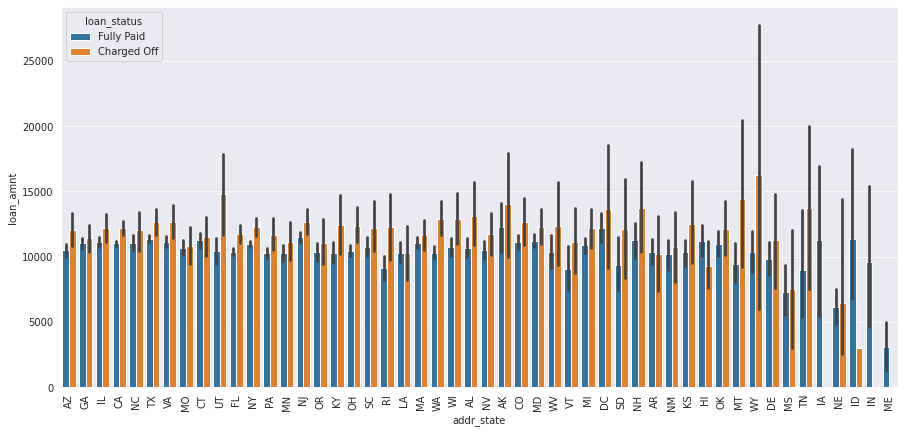

+------------+--------+----------+---------+--------+---------+---------+----------+---------+
| addr_state | count  |   mean   |   std   |  min   |   25%   |   50%   |   75%    |   max   |
+------------+--------+----------+---------+--------+---------+---------+----------+---------+
|     ME     |  3.0   | 3066.67  | 1900.88 | 1200.0 |  2100.0 |  3000.0 |  4000.0  |  5000.0 |
|     NE     |  5.0   |  6340.0  | 4954.09 | 2500.0 |  2500.0 |  4800.0 |  7500.0  | 14400.0 |
|     MS     |  19.0  | 7322.37  | 4214.37 | 2500.0 |  3850.0 |  6000.0 | 10312.5  | 17400.0 |
|     VT     |  54.0  | 9335.19  | 6111.95 | 1000.0 |  5250.0 |  8837.5 | 11750.0  | 35000.0 |
|     TN     |  17.0  | 9539.71  | 8268.92 | 1500.0 |  4550.0 |  7200.0 |  7500.0  | 28000.0 |
|     IN     |  9.0   | 9580.56  | 8718.23 | 1000.0 |  3000.0 |  5300.0 | 11300.0  | 25000.0 |
|     RI     | 198.0  | 9645.08  | 6397.02 | 1000.0 |  5000.0 |  8000.0 | 12981.25 | 30000.0 |
|     SD     |  64.0  | 9861.72  | 7025.08 | 700.0

In [112]:
plt.figure(figsize=(15,7))
sns.barplot(x= loan_data[~(loan_data['loan_status']=='Current')].addr_state, y= loan_data[~(loan_data['loan_status']=='Current')].loan_amnt,hue=loan_data[~(loan_data['loan_status']=='Current')].loan_status,estimator=np.mean)
plt.xticks(rotation='vertical')
plt.show()

x=pd.DataFrame(loan_data.groupby(['addr_state']).loan_amnt.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x.sort_values(by='mean')))


**Observation**

The loans have been sanctioned for AK is the highest average loan amount and the highest average loan amount that was charged off have been sanctioned for WY. 

# Analysis between 'addr_state' ,'loan_status'




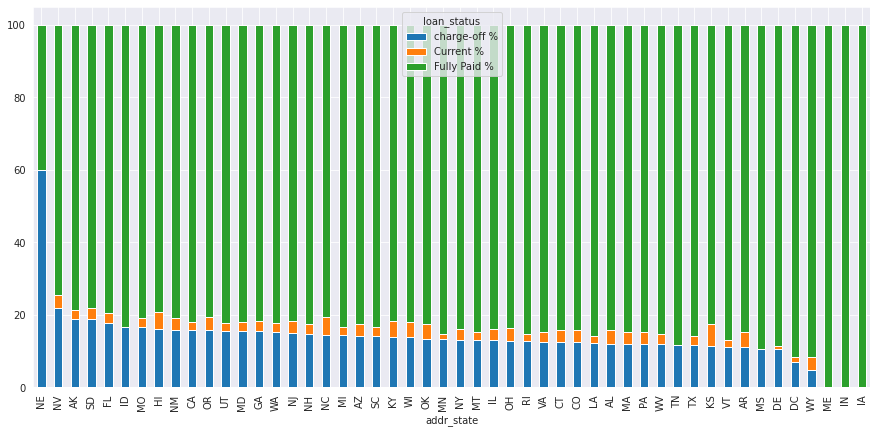

+------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
| addr_state | Charged Off | Current | Fully Paid | Total_no_loan | charge-off % | Current % | Fully Paid % |
+------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
|     NE     |     3.0     |   0.0   |    2.0     |      5.0      |     60.0     |    0.0    |     40.0     |
|     NV     |    108.0    |   18.0  |   371.0    |     497.0     |    21.73     |    3.62   |    74.65     |
|     AK     |     15.0    |   2.0   |    63.0    |      80.0     |    18.75     |    2.5    |    78.75     |
|     SD     |     12.0    |   2.0   |    50.0    |      64.0     |    18.75     |    3.12   |    78.12     |
|     FL     |    504.0    |   85.0  |   2277.0   |     2866.0    |    17.59     |    2.97   |    79.45     |
|     ID     |     1.0     |   0.0   |    5.0     |      6.0      |    16.67     |    0.0    |    83.33     |
|     MO  

In [113]:
percentage('addr_state','loan_status',loan_data)



**Observation**

NE ,NV,AK are the state where the percentage of charged off is high.

States with higher Charge Off rates have very low number of loans.

The loans have been sanctioned for AK is the highest average loan amount and also the chances to be charged off is high.

The charged off loans, which have highest average loan amount ,have been sanctioned for WY but the  chances to be charged off is low

# **Feature dti :**
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

**Finding Null values**

In [114]:
print('{}% value as empty for feature:dti'.format(round(((loan_data.dti.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:dti


In [115]:
loan_data.dti.describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

**Percentile analysis of installment**

In [116]:
for i in range(0,101,10):
    print('{} percetile {}'.format(i,np.percentile(loan_data['dti'],i)))

0 percetile 0.0
10 percetile 4.08
20 percetile 6.98
30 percetile 9.29
40 percetile 11.38
50 percetile 13.4
60 percetile 15.36
70 percetile 17.48
80 percetile 19.75
90 percetile 22.33
100 percetile 29.99


In [117]:
for i in range(90,101,1):
    print('{} percetile {}'.format(i,np.percentile(loan_data['dti'],i)))

90 percetile 22.33
91 percetile 22.59
92 percetile 22.88
93 percetile 23.17880000000005
94 percetile 23.5
95 percetile 23.84
96 percetile 24.17
97 percetile 24.54
98 percetile 24.879999999999995
99 percetile 26.68
100 percetile 29.99


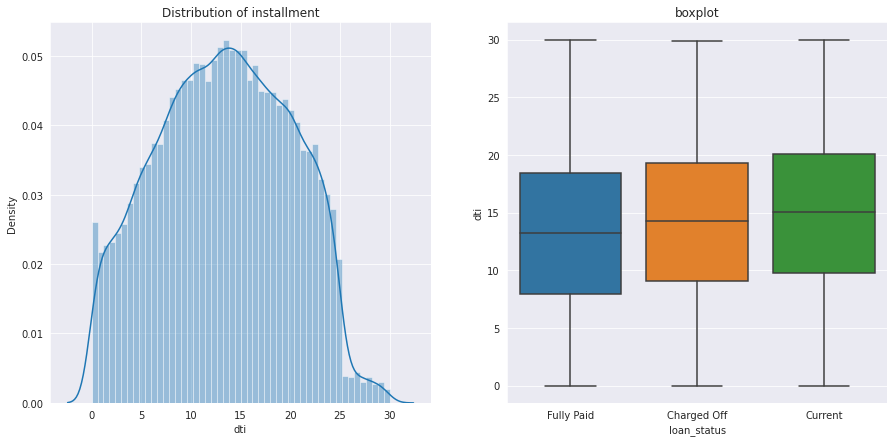

In [118]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.distplot(loan_data.dti,ax= axes[0])
axes[0].set_title('Distribution of installment')

sns.boxplot(x=loan_data.loan_status,y=loan_data['dti'])
plt.title('boxplot')
plt.show()


**Observation**

Most of the borrower's dti ratio less than 20,there are vary few borrowers whose dti ratio is higher than 20. 

dti ratio is high for the charged off loan .

# **Feature delinq_2yrs :**

The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

**Finding Null values**

In [119]:
print('{}% value as empty for feature:delinq_2yrs'.format(round(((loan_data.delinq_2yrs.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:delinq_2yrs


**Number of loan in each catgory of delinq_2yrs**

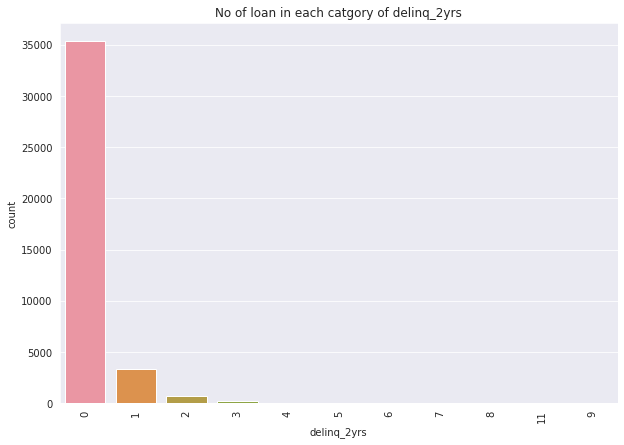

+-------+-------------+
| index | delinq_2yrs |
+-------+-------------+
|   0   |    35405    |
|   1   |     3303    |
|   2   |     687     |
|   3   |     220     |
|   4   |      62     |
|   5   |      22     |
|   6   |      10     |
|   7   |      4      |
|   8   |      2      |
|   11  |      1      |
|   9   |      1      |
+-------+-------------+


In [120]:
plt.figure(figsize=(10,7))
sns.countplot(loan_data.delinq_2yrs,order=loan_data.delinq_2yrs.value_counts().index)
plt.title('No of loan in each catgory of delinq_2yrs')
plt.xticks(rotation='vertical')
plt.show()

x=pd.DataFrame(loan_data['delinq_2yrs'].value_counts())
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

Most of the cases deliquency rate is 0.

# Analysis between 'delinq_2yrs' ,'loan_status' and 'loan_amnt'

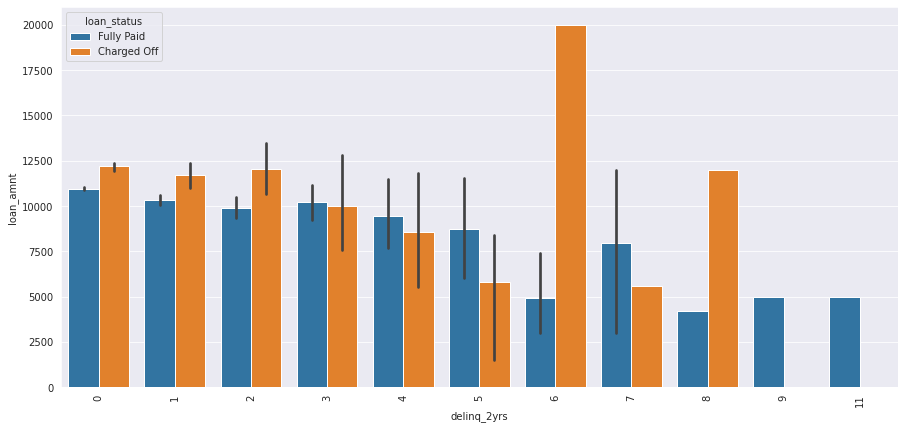

+-------------+---------+----------+---------+--------+--------+---------+---------+---------+
| delinq_2yrs |  count  |   mean   |   std   |  min   |  25%   |   50%   |   75%   |   max   |
+-------------+---------+----------+---------+--------+--------+---------+---------+---------+
|     9.0     |   1.0   |  5000.0  |   nan   | 5000.0 | 5000.0 |  5000.0 |  5000.0 |  5000.0 |
|     11.0    |   1.0   |  5000.0  |   nan   | 5000.0 | 5000.0 |  5000.0 |  5000.0 |  5000.0 |
|     6.0     |   10.0  |  6430.0  | 5879.73 | 1000.0 | 2575.0 |  5250.0 |  7875.0 | 20000.0 |
|     7.0     |   4.0   | 7368.75  | 3912.87 | 3000.0 | 4950.0 |  7237.5 | 9656.25 | 12000.0 |
|     8.0     |   2.0   |  8100.0  | 5515.43 | 4200.0 | 6150.0 |  8100.0 | 10050.0 | 12000.0 |
|     5.0     |   22.0  | 8430.68  | 6338.23 | 1500.0 | 4275.0 |  7250.0 | 10600.0 | 25000.0 |
|     4.0     |   62.0  | 9386.29  | 6283.52 | 1200.0 | 5000.0 |  8250.0 | 12000.0 | 35000.0 |
|     3.0     |  220.0  | 10431.82 | 7275.78 | 100

In [121]:
plt.figure(figsize=(15,7))
sns.barplot(x= loan_data[~(loan_data['loan_status']=='Current')].delinq_2yrs, y= loan_data[~(loan_data['loan_status']=='Current')].loan_amnt,hue=loan_data[~(loan_data['loan_status']=='Current')].loan_status,estimator=np.mean)
plt.xticks(rotation='vertical')
plt.show()

x=pd.DataFrame(loan_data.groupby(['delinq_2yrs']).loan_amnt.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x.sort_values(by='mean')))


**Observation**

The maximum amount of loan has been given to the person whose deliquency rate is 0.

# Analysis between 'delinq_2yrs' ,'loan_status'

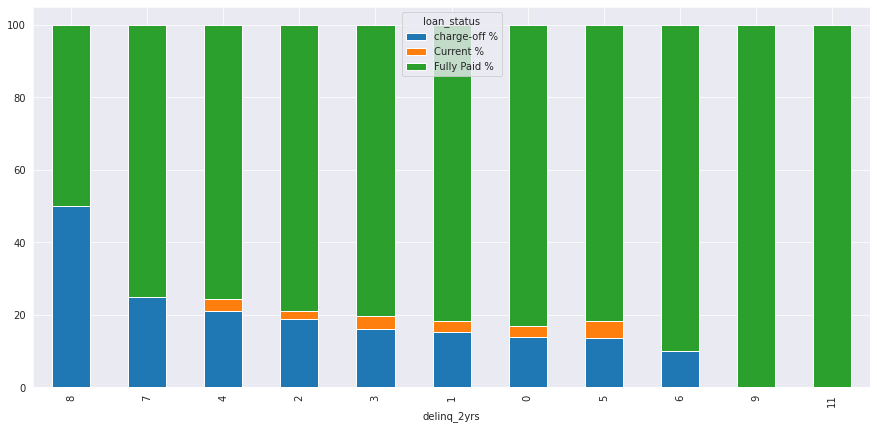

+-------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
| delinq_2yrs | Charged Off | Current | Fully Paid | Total_no_loan | charge-off % | Current % | Fully Paid % |
+-------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
|     8.0     |     1.0     |   0.0   |    1.0     |      2.0      |     50.0     |    0.0    |     50.0     |
|     7.0     |     1.0     |   0.0   |    3.0     |      4.0      |     25.0     |    0.0    |     75.0     |
|     4.0     |     13.0    |   2.0   |    47.0    |      62.0     |    20.97     |    3.23   |    75.81     |
|     2.0     |    130.0    |   14.0  |   543.0    |     687.0     |    18.92     |    2.04   |    79.04     |
|     3.0     |     35.0    |   8.0   |   177.0    |     220.0     |    15.91     |    3.64   |    80.45     |
|     1.0     |    507.0    |   96.0  |   2700.0   |     3303.0    |    15.35     |    2.91   |    81.74     |
|

In [122]:
percentage('delinq_2yrs','loan_status',loan_data)



**Observation**

Most of the cases deliquency rate is 0.

The charged off loan percentage high for deliquency rate is 8.

# **Feature inq_last_6mths :**

The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

**Finding Null values**

In [123]:
print('{}% value as empty for feature:inq_last_6mths'.format(round(((loan_data.inq_last_6mths.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:inq_last_6mths


**Number of loan in each catgory of inq_last_6mths**

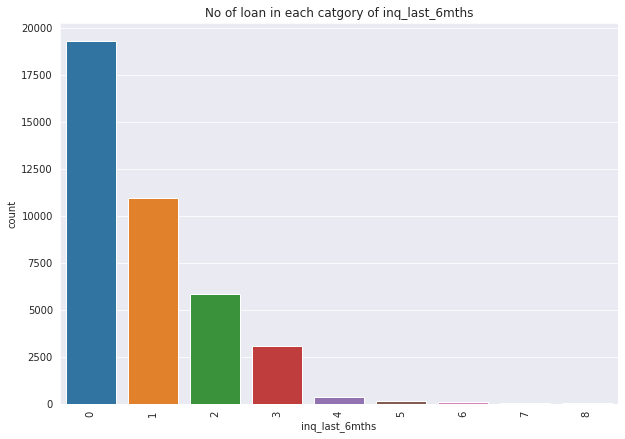

+-------+----------------+
| index | inq_last_6mths |
+-------+----------------+
|   0   |     19300      |
|   1   |     10971      |
|   2   |      5812      |
|   3   |      3048      |
|   4   |      326       |
|   5   |      146       |
|   6   |       64       |
|   7   |       35       |
|   8   |       15       |
+-------+----------------+


In [124]:
plt.figure(figsize=(10,7))
sns.countplot(loan_data.inq_last_6mths,order=loan_data.inq_last_6mths.value_counts().index)
plt.title('No of loan in each catgory of inq_last_6mths')
plt.xticks(rotation='vertical')
plt.show()

x=pd.DataFrame(loan_data['inq_last_6mths'].value_counts())
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

The maximum nos of borrowers do not make any enquiry.

# Analysis between 'inq_last_6mths' ,'loan_status'

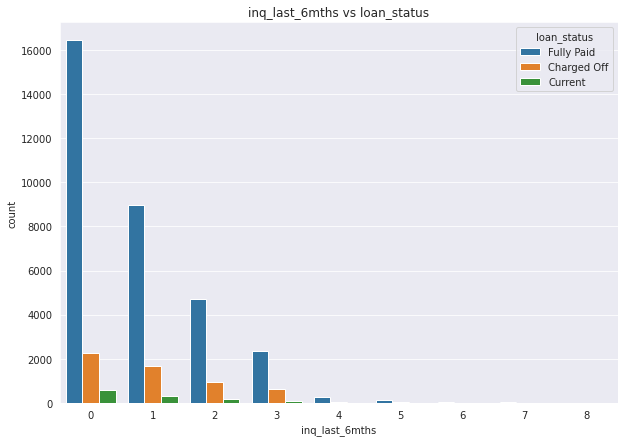

In [125]:
plt.figure(figsize=(10,7))
sns.countplot(loan_data.inq_last_6mths,order=loan_data.inq_last_6mths.value_counts().index, hue = loan_data.loan_status)
plt.title('inq_last_6mths vs loan_status')
plt.show()

**Observation**

this feature is not directly related with the loan status

# **Feature open_acc :**

The number of open credit lines in the borrower's credit file.

**Finding Null values**

In [126]:
print('{}% value as empty for feature:open_acc'.format(round(((loan_data.open_acc.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:open_acc


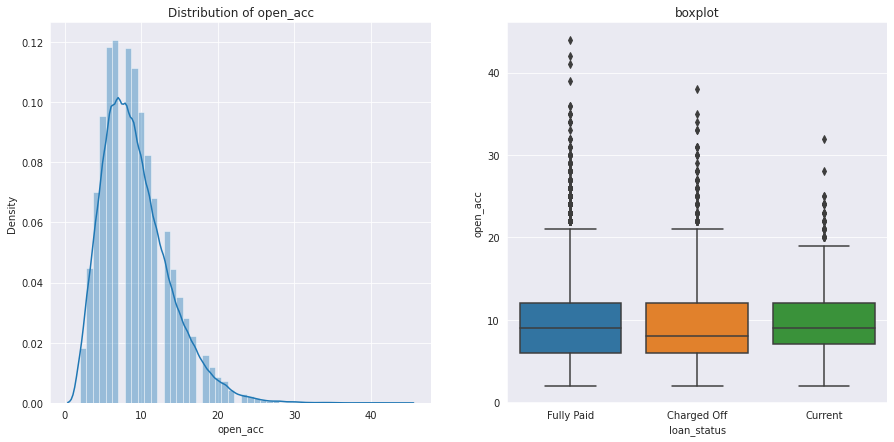

In [127]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.distplot(loan_data.open_acc,ax= axes[0])
axes[0].set_title('Distribution of open_acc')

sns.boxplot(x=loan_data.loan_status,y=loan_data['open_acc'])
plt.title('boxplot')
plt.show()


**Observation**

loan status is not directly dependent on The number of open credit lines in the borrower's credit file.

# **Feature pub_rec :**



**Finding Null values**

In [128]:
print('{}% value as empty for feature:pub_rec'.format(round(((loan_data.pub_rec.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:pub_rec


**Number of loan in each catgory of pub_rec**

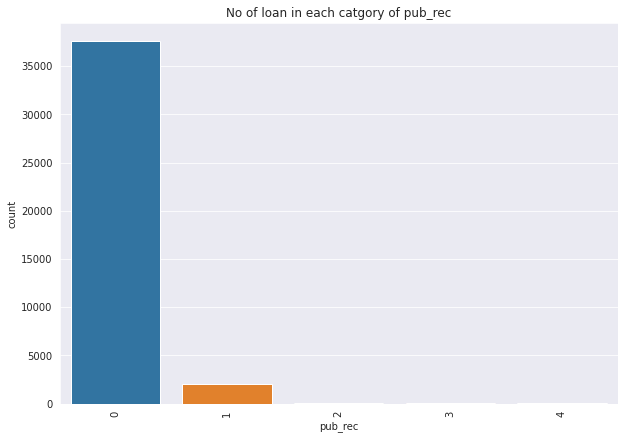

+-------+---------+
| index | pub_rec |
+-------+---------+
|   0   |  37601  |
|   1   |   2056  |
|   2   |    51   |
|   3   |    7    |
|   4   |    2    |
+-------+---------+


In [129]:
plt.figure(figsize=(10,7))
sns.countplot(loan_data.pub_rec,order=loan_data.pub_rec.value_counts().index)
plt.title('No of loan in each catgory of pub_rec')
plt.xticks(rotation='vertical')
plt.show()

x=pd.DataFrame(loan_data['pub_rec'].value_counts())
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

Most of the cases number of derogatory public records is 0.

# Analysis between 'pub_rec' ,'loan_status'

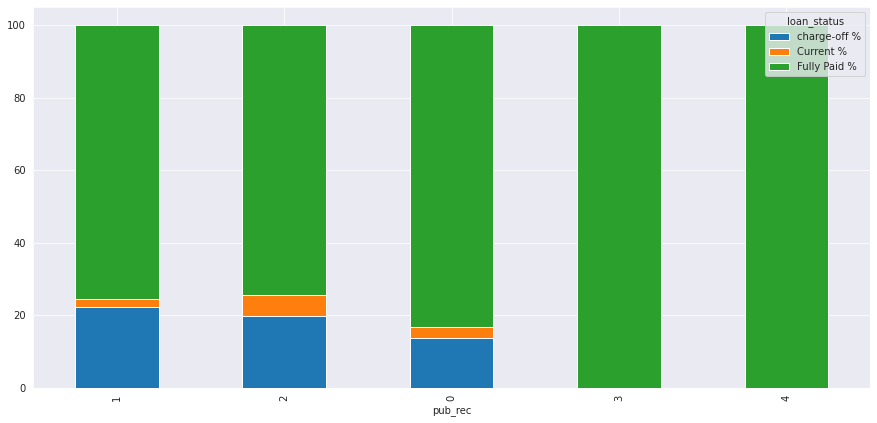

+---------+-------------+---------+------------+---------------+--------------+-----------+--------------+
| pub_rec | Charged Off | Current | Fully Paid | Total_no_loan | charge-off % | Current % | Fully Paid % |
+---------+-------------+---------+------------+---------------+--------------+-----------+--------------+
|   1.0   |    457.0    |   43.0  |   1556.0   |     2056.0    |    22.23     |    2.09   |    75.68     |
|   2.0   |     10.0    |   3.0   |    38.0    |      51.0     |    19.61     |    5.88   |    74.51     |
|   0.0   |    5160.0   |  1094.0 |  31347.0   |    37601.0    |    13.72     |    2.91   |    83.37     |
|   3.0   |     0.0     |   0.0   |    7.0     |      7.0      |     0.0      |    0.0    |    100.0     |
|   4.0   |     0.0     |   0.0   |    2.0     |      2.0      |     0.0      |    0.0    |    100.0     |
+---------+-------------+---------+------------+---------------+--------------+-----------+--------------+


In [130]:
percentage('pub_rec','loan_status',loan_data)



**Observation**

There is no perticular relationship between derogatory public records and loan status. But if number of derogatory public records is increasd , the chances of charge off is also increased

# **Feature pub_rec_bankruptcies :**

Number of public record bankruptcies

**Finding Null values**

In [131]:
print('{}% value as empty for feature:pub_rec_bankruptcies'.format(round(((loan_data.pub_rec_bankruptcies.isnull().sum()/loan_data.shape[0])*100),2)))

1.75% value as empty for feature:pub_rec_bankruptcies


In [132]:
loan_data.pub_rec_bankruptcies.fillna('Missimg',inplace=True)

**Number of loan in each catgory of pub_rec_bankruptcies**

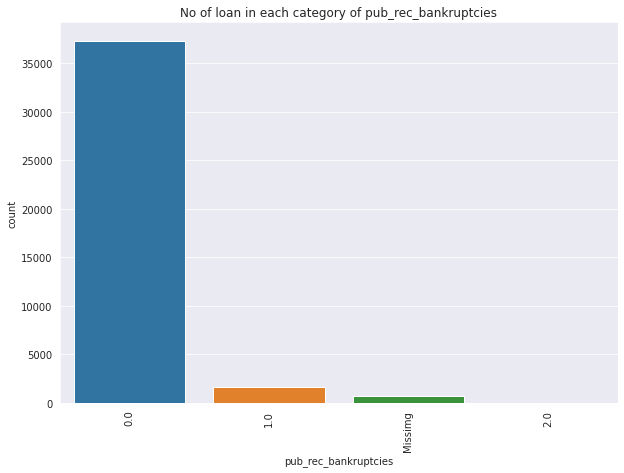

+---------+----------------------+
|  index  | pub_rec_bankruptcies |
+---------+----------------------+
|   0.0   |        37339         |
|   1.0   |         1674         |
| Missimg |         697          |
|   2.0   |          7           |
+---------+----------------------+


In [133]:
plt.figure(figsize=(10,7))
sns.countplot(loan_data.pub_rec_bankruptcies,order=loan_data.pub_rec_bankruptcies.value_counts().index)
plt.title('No of loan in each category of pub_rec_bankruptcies')
plt.xticks(rotation='vertical')
plt.show()

x=pd.DataFrame(loan_data['pub_rec_bankruptcies'].value_counts())
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

 Most of the cases number of number of public record bankruptcies is 0.

# Analysis between 'pub_rec_bankruptcies' ,'loan_status'

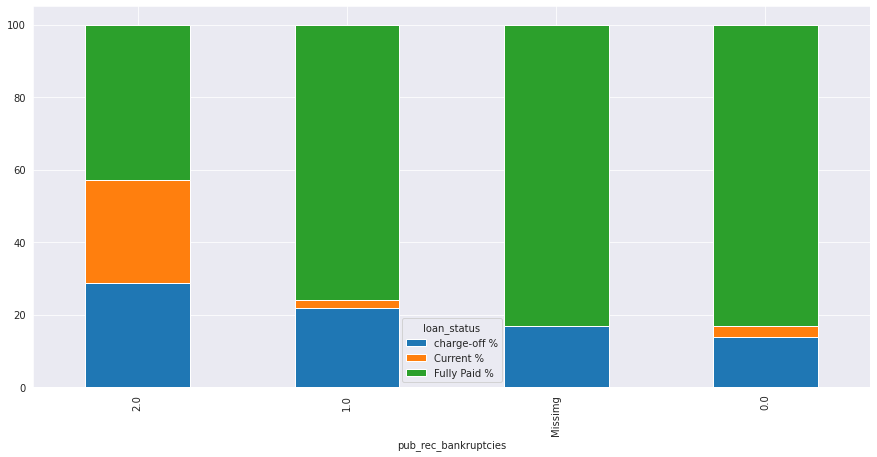

+----------------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
| pub_rec_bankruptcies | Charged Off | Current | Fully Paid | Total_no_loan | charge-off % | Current % | Fully Paid % |
+----------------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
|         2.0          |     2.0     |   2.0   |    3.0     |      7.0      |    28.57     |   28.57   |    42.86     |
|         1.0          |    366.0    |   37.0  |   1271.0   |     1674.0    |    21.86     |    2.21   |    75.93     |
|       Missimg        |    118.0    |   0.0   |   579.0    |     697.0     |    16.93     |    0.0    |    83.07     |
|         0.0          |    5141.0   |  1101.0 |  31097.0   |    37339.0    |    13.77     |    2.95   |    83.28     |
+----------------------+-------------+---------+------------+---------------+--------------+-----------+--------------+


In [134]:
percentage('pub_rec_bankruptcies','loan_status',loan_data)



**Observation**

From the above analysis we can conclude,if the number of public record bankruptcies is high, the possibility to be defaulter is high

# **Feature revol_bal :**

Total credit revolving balance

**Finding Null values**

In [135]:
print('{}% value as empty for feature:revol_bal'.format(round(((loan_data.revol_bal.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:revol_bal



# Analysis between 'revol_bal' ,'loan_status'

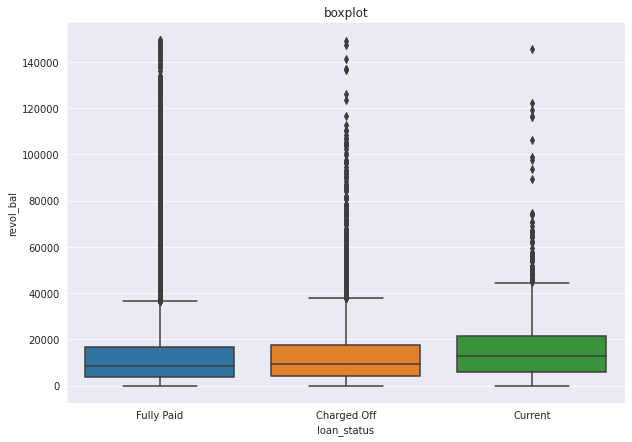

In [136]:
plt.figure(figsize=(10,7))
sns.boxplot(x=loan_data.loan_status,y=loan_data['revol_bal'])
plt.title('boxplot')
plt.show()


**Observation**

loan status is not directly dependent on total credit revolving balance

# **Feature revol_util :**

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

**Finding Null values**

In [137]:
print('{}% value as empty for feature:revol_util'.format(round(((loan_data.revol_util.isnull().sum()/loan_data.shape[0])*100),2)))

0.13% value as empty for feature:revol_util


In [138]:
loan_data.revol_util=loan_data.revol_util.astype('float32')
loan_data.revol_util.describe()

count    39667.000000
mean        48.832287
std         28.332520
min          0.000000
25%         25.400000
50%         49.299999
75%         72.400002
max         99.900002
Name: revol_util, dtype: float64

# Analysis between 'revol_util' ,'loan_status'

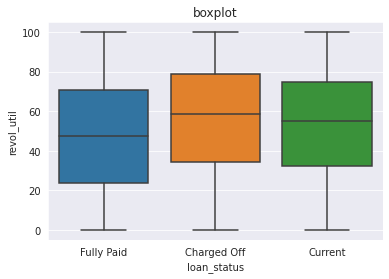

+-------------+---------+-------+-------+-----+-------+-------+------+------+
| loan_status |  count  |  mean |  std  | min |  25%  |  50%  | 75%  | max  |
+-------------+---------+-------+-------+-----+-------+-------+------+------+
| Charged Off |  5611.0 | 55.57 | 27.91 | 0.0 |  34.4 |  58.4 | 79.0 | 99.9 |
|   Current   |  1140.0 |  53.2 | 26.87 | 0.0 | 32.57 | 54.95 | 74.8 | 99.9 |
|  Fully Paid | 32916.0 | 47.53 | 28.28 | 0.0 |  23.9 |  47.6 | 70.8 | 99.9 |
+-------------+---------+-------+-------+-----+-------+-------+------+------+


In [139]:
loan_data.revol_util=loan_data.revol_util.astype('float32')
sns.boxplot(x=loan_data.loan_status,y=loan_data['revol_util'])
plt.title('boxplot')

plt.show()
x=pd.DataFrame(loan_data.groupby(['loan_status']).revol_util.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

The average of the revolving line utilization rate is high in case of charged off loan

# **Feature out_prncp :**
Remaining outstanding principal for total amount funded

**Finding Null values**

In [140]:
print('{}% value as empty for feature:out_prncp'.format(round(((loan_data.out_prncp.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:out_prncp


In [141]:
loan_data.out_prncp.describe()

count    39717.000000
mean        51.227887
std        375.172839
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6311.470000
Name: out_prncp, dtype: float64

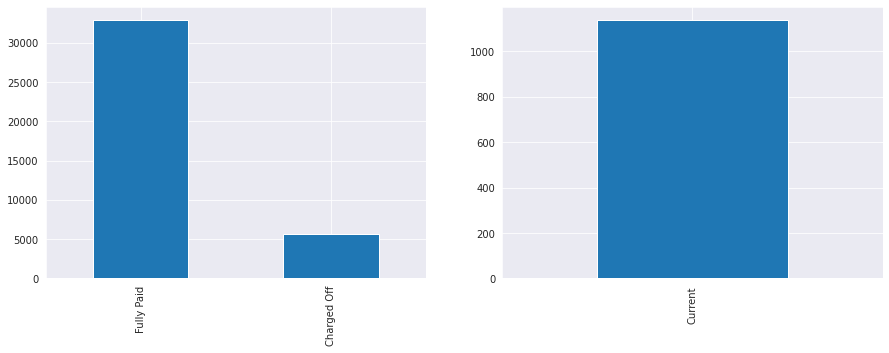

In [142]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
loan_data[loan_data.out_prncp == float(0)].loan_status.value_counts().sort_values(ascending = False).plot(kind = 'bar',ax=axes[0])
loan_data[loan_data.out_prncp != float(0)].loan_status.value_counts().sort_values(ascending = False).plot(kind = 'bar',ax=axes[1])
plt.show()

**Observation**

From the above stats we can conclude principal amount has been recovered for both the loan status(Fully Paid and charge off) and we aren't considering for loan status as 'current'. Hence this feature is not carrying any significance to determine the loan status, dropping this feature.

The features ['out_prncp','out_prncp_inv'] are related to the post loan sanction. Loan status prediction can't be determined by these feature at the begining as we won't be having data to judge. Hence, dropping these features.

In [143]:
loan_data=loan_data.drop(['out_prncp','out_prncp_inv'],axis=1)

# **Feature total_acc :**

The total number of credit lines currently in the borrower's credit file

**Finding Null values**

In [144]:
print('{}% value as empty for feature:total_acc'.format(round(((loan_data.total_acc.isnull().sum()/loan_data.shape[0])*100),2)))

0.0% value as empty for feature:total_acc


# Analysis between 'total_acc' ,'loan_status'

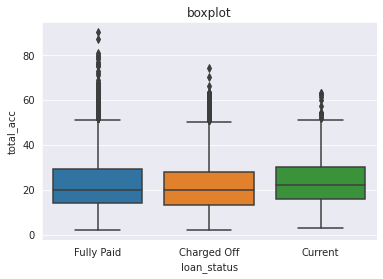

+-------------+---------+-------+-------+-----+------+------+------+------+
| loan_status |  count  |  mean |  std  | min | 25%  | 50%  | 75%  | max  |
+-------------+---------+-------+-------+-----+------+------+------+------+
| Charged Off |  5627.0 | 21.43 | 11.45 | 2.0 | 13.0 | 20.0 | 28.0 | 74.0 |
|   Current   |  1140.0 | 23.31 | 10.48 | 3.0 | 16.0 | 22.0 | 30.0 | 63.0 |
|  Fully Paid | 32950.0 | 22.16 | 11.42 | 2.0 | 14.0 | 20.0 | 29.0 | 90.0 |
+-------------+---------+-------+-------+-----+------+------+------+------+


In [145]:
sns.boxplot(x=loan_data.loan_status,y=loan_data['total_acc'])
plt.title('boxplot')

plt.show()
x=pd.DataFrame(loan_data.groupby(['loan_status']).total_acc.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

loan status is not directly dependent on the total number of credit lines currently in the borrower's credit file

# **Feature total_pymnt,total_pymnt_inv :**

Payments received to date for total amount funded

# Analysis between 'total_pymnt' ,'loan_status' and 'total_pymnt_inv' ,'loan_status'

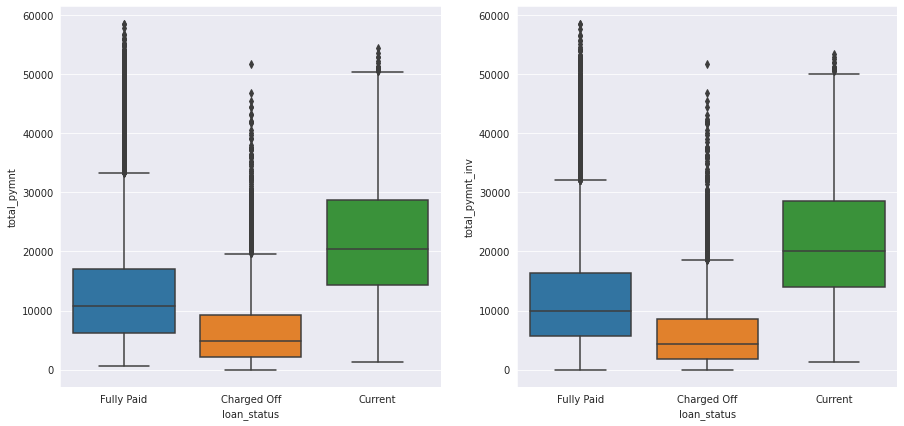

In [146]:
fig, axes = plt.subplots(1,2,figsize=(15,7))

loan_data.revol_util=loan_data.total_pymnt.astype('float32')
sns.boxplot(x=loan_data.loan_status,y=loan_data['total_pymnt'],ax=axes[0])


loan_data.total_pymnt_inv=loan_data.total_pymnt_inv.astype('float32')
sns.boxplot(x=loan_data.loan_status,y=loan_data['total_pymnt_inv'],ax=axes[1])

plt.show()


**Observation**

Payments received to date for total amount funded is less in case of charged of loan and also payments received to date for portion of total amount funded by investors is less in case of charged of loan

These two features are not giving any information bast on which we can decide the loan will be fully paid or charged off,because these are directly related to the post situation after giving the loan.So we can drop those features

In [147]:
loan_data=loan_data.drop(['total_pymnt','total_pymnt_inv'],axis=1)

# **Feature total_rec_prncp,total_rec_int :**

Principal received to date

#Analysis between 'total_rec_prncp' ,'loan_status' and 'total_rec_int' ,'loan_status'

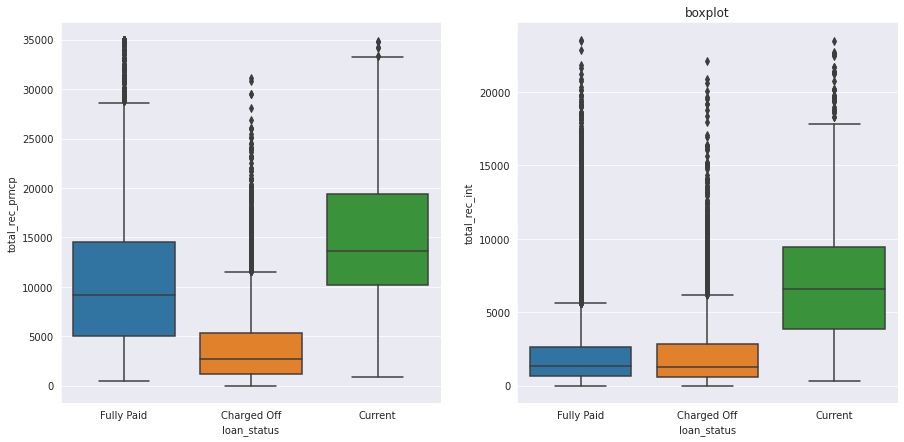

In [148]:
fig, axes = plt.subplots(1,2,figsize=(15,7))

loan_data.revol_util=loan_data.total_rec_prncp.astype('float32')
sns.boxplot(x=loan_data.loan_status,y=loan_data['total_rec_prncp'],ax=axes[0])
plt.title('boxplot')


loan_data.total_pymnt_inv=loan_data.total_rec_int.astype('float32')
sns.boxplot(x=loan_data.loan_status,y=loan_data['total_rec_int'],ax=axes[1])
plt.title('boxplot')

plt.show()

**Observation**

The principal amount received to date is very less in case of charged off loan.

These two features are directly related to the post situation after giving the loan so that we can say these features are irrelevant for this analysis

The features named='total_rec_late_fee', 'recoveries' and'collection_recovery_fee' are related to the post situation after giving the loan as all of them are directlly related to chraged loans.So that we can say these features are irrelevant for this analysis

In [149]:
loan_data=loan_data.drop(['total_rec_prncp','total_rec_int','total_rec_late_fee', 'recoveries' ,'collection_recovery_fee'],axis=1)

# **Feature issue_d_year,issue_d_month :**

The month which the loan was funded

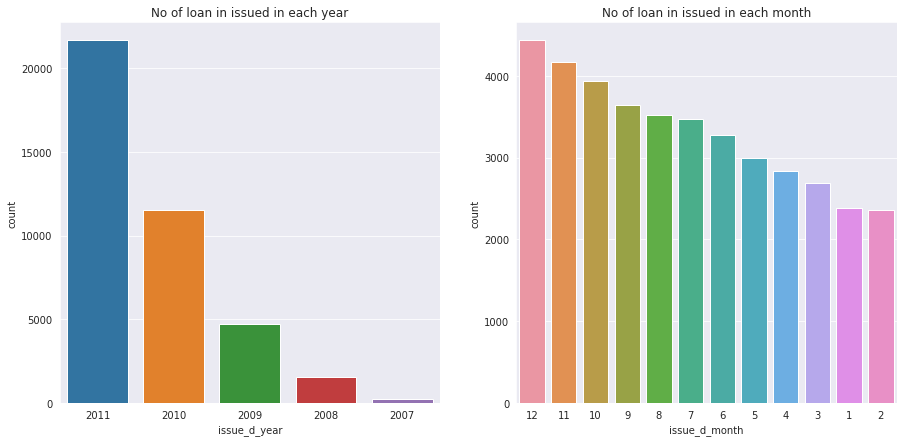

In [150]:
fig, axes = plt.subplots(1,2,figsize=(15,7))

sns.countplot(loan_data.issue_d_year,order=loan_data.issue_d_year.value_counts().index,ax= axes[0])
axes[0].set_title('No of loan in issued in each year')

sns.countplot(loan_data.issue_d_month,order=loan_data.issue_d_month.value_counts().index,ax= axes[1])
axes[1].set_title('No of loan in issued in each month')
plt.show()

**Observation**

Number of loans is increased over the year.The maximum loan has been given in the year of 2011.

The maximum loan has been given in the month of December.We need to analysis this feature with loan amount and loan status to get better conclusion

#Analysis between 'issue_d_year' ,'loan_amnt'

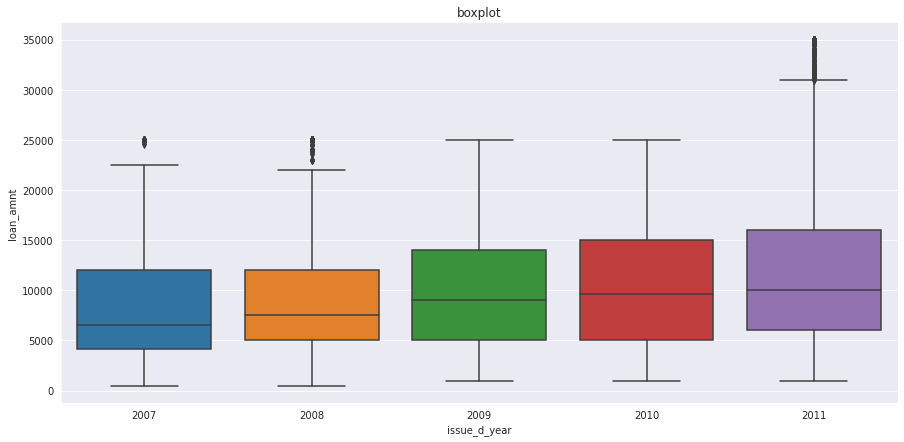

+--------------+---------+----------+---------+--------+--------+---------+---------+---------+
| issue_d_year |  count  |   mean   |   std   |  min   |  25%   |   50%   |   75%   |   max   |
+--------------+---------+----------+---------+--------+--------+---------+---------+---------+
|    2007.0    |  251.0  | 8841.73  | 6447.77 | 500.0  | 4137.5 |  6500.0 | 12000.0 | 25000.0 |
|    2008.0    |  1562.0 | 9212.72  | 5774.29 | 500.0  | 5000.0 |  7500.0 | 12000.0 | 25000.0 |
|    2009.0    |  4716.0 | 9846.55  |  5934.1 | 1000.0 | 5000.0 |  9000.0 | 14000.0 | 25000.0 |
|    2010.0    | 11532.0 | 10583.61 | 6602.36 | 1000.0 | 5000.0 |  9600.0 | 15000.0 | 25000.0 |
|    2011.0    | 21656.0 | 12029.3  |  8159.4 | 1000.0 | 6000.0 | 10000.0 | 16000.0 | 35000.0 |
+--------------+---------+----------+---------+--------+--------+---------+---------+---------+


In [151]:
plt.figure(figsize=(15,7))

sns.boxplot(x=loan_data.issue_d_year,y=loan_data['loan_amnt'])
plt.title('boxplot')
plt.show()

x=pd.DataFrame(loan_data.groupby(['issue_d_year']).loan_amnt.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

The avg loan amount taken by the borrower in the year 2011 is more than the others .

we can see previously number of loans is increased over the year and the loan amount is also increased over the year


# Analysis between 'issue_d_month' ,'loan_amnt'

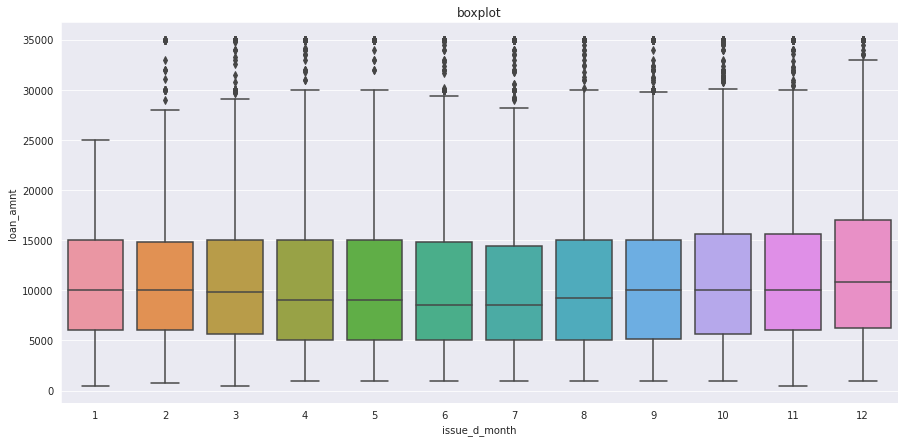

+---------------+--------+----------+---------+--------+--------+---------+---------+---------+
| issue_d_month | count  |   mean   |   std   |  min   |  25%   |   50%   |   75%   |   max   |
+---------------+--------+----------+---------+--------+--------+---------+---------+---------+
|      1.0      | 2379.0 | 10656.4  | 6279.33 | 500.0  | 6000.0 | 10000.0 | 15000.0 | 25000.0 |
|      2.0      | 2358.0 | 10767.79 | 6647.17 | 750.0  | 6000.0 | 10000.0 | 14862.5 | 35000.0 |
|      3.0      | 2692.0 | 10954.23 | 7156.44 | 500.0  | 5600.0 |  9800.0 | 15000.0 | 35000.0 |
|      4.0      | 2834.0 | 10731.69 | 7315.05 | 1000.0 | 5000.0 |  9000.0 | 15000.0 | 35000.0 |
|      5.0      | 2999.0 | 10846.61 | 7330.83 | 1000.0 | 5000.0 |  9000.0 | 15000.0 | 35000.0 |
|      6.0      | 3279.0 | 10632.09 | 7559.03 | 1000.0 | 5000.0 |  8500.0 | 14825.0 | 35000.0 |
|      7.0      | 3476.0 | 10540.27 | 7266.07 | 1000.0 | 5000.0 |  8500.0 | 14400.0 | 35000.0 |
|      8.0      | 3518.0 | 11054.27 | 75

In [152]:
plt.figure(figsize=(15,7))

sns.boxplot(x=loan_data.issue_d_month,y=loan_data['loan_amnt'])
plt.title('boxplot')
plt.show()

x=pd.DataFrame(loan_data.groupby(['issue_d_month']).loan_amnt.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

There is very less difference in the avg loan amount taken by the borrower through out the month but it has been observed the avg loan amount taken by the borrower in the month of December is more than the others .

# Analysis between 'issue_d_year' ,'loan_status'

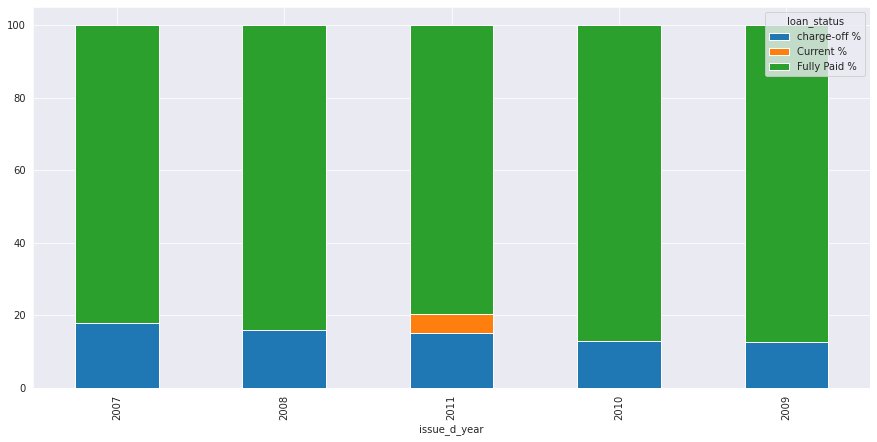

+--------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
| issue_d_year | Charged Off | Current | Fully Paid | Total_no_loan | charge-off % | Current % | Fully Paid % |
+--------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
|    2007.0    |     45.0    |   0.0   |   206.0    |     251.0     |    17.93     |    0.0    |    82.07     |
|    2008.0    |    247.0    |   0.0   |   1315.0   |     1562.0    |    15.81     |    0.0    |    84.19     |
|    2011.0    |    3256.0   |  1140.0 |  17260.0   |    21656.0    |    15.04     |    5.26   |     79.7     |
|    2010.0    |    1485.0   |   0.0   |  10047.0   |    11532.0    |    12.88     |    0.0    |    87.12     |
|    2009.0    |    594.0    |   0.0   |   4122.0   |     4716.0    |     12.6     |    0.0    |     87.4     |
+--------------+-------------+---------+------------+---------------+--------------+-----------+--------

In [153]:
percentage('issue_d_year','loan_status',loan_data)

**Observation**

The number of loans and the avg loan amount taken by the borrower is less in 2007 but the charged off percentage is high than others.

# Analysis between 'issue_d_month' ,'loan_status'

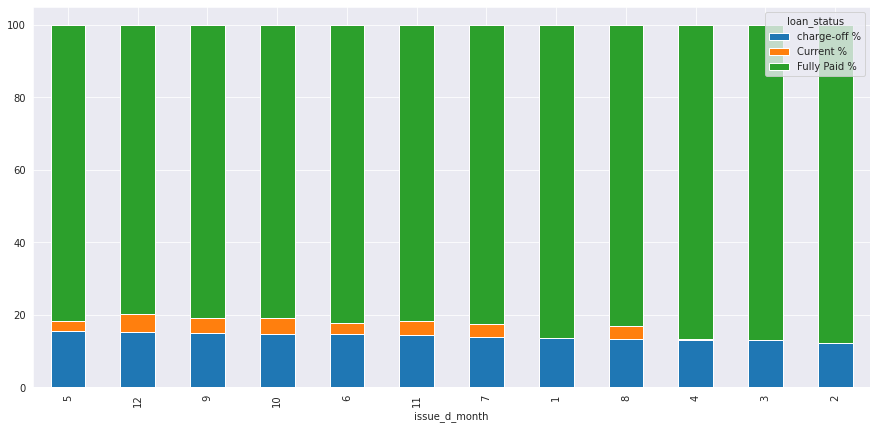

+---------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
| issue_d_month | Charged Off | Current | Fully Paid | Total_no_loan | charge-off % | Current % | Fully Paid % |
+---------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
|      5.0      |    466.0    |   80.0  |   2453.0   |     2999.0    |    15.54     |    2.67   |    81.79     |
|      12.0     |    678.0    |  218.0  |   3537.0   |     4433.0    |    15.29     |    4.92   |    79.79     |
|      9.0      |    547.0    |  150.0  |   2951.0   |     3648.0    |    14.99     |    4.11   |    80.89     |
|      10.0     |    580.0    |  173.0  |   3181.0   |     3934.0    |    14.74     |    4.4    |    80.86     |
|      6.0      |    483.0    |   99.0  |   2697.0   |     3279.0    |    14.73     |    3.02   |    82.25     |
|      11.0     |    598.0    |  161.0  |   3408.0   |     4167.0    |    14.35     |    3.86   

In [154]:
percentage('issue_d_month','loan_status',loan_data)

**Observation**

There is no significant difference of the percentage of charged off loan through out the month

# **Feature last_pymnt_d_year, last_pymnt_d_month :**

Last total payment amount received

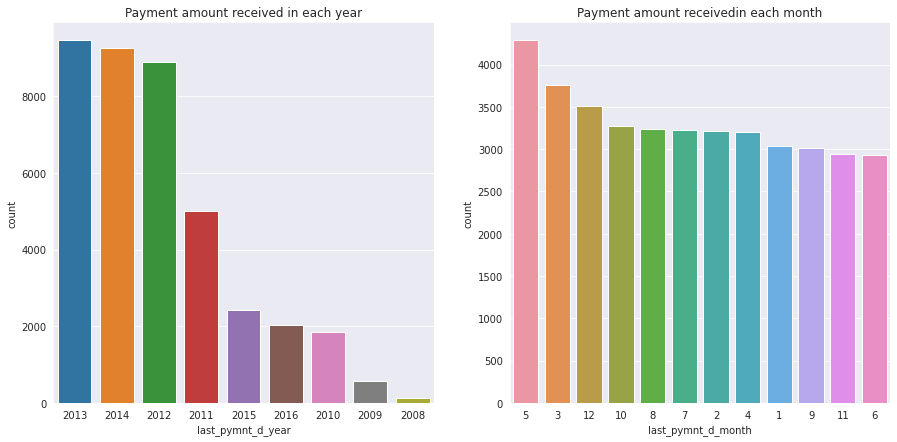

In [155]:
fig, axes = plt.subplots(1,2,figsize=(15,7))

sns.countplot(loan_data.last_pymnt_d_year,order=loan_data.last_pymnt_d_year.value_counts().index,ax= axes[0])
axes[0].set_title('Payment amount received in each year')

sns.countplot(loan_data.last_pymnt_d_month,order=loan_data.last_pymnt_d_month.value_counts().index,ax= axes[1])
axes[1].set_title('Payment amount receivedin each month')
plt.show()

**Observation**

The maximum payments have been recieved in between 2011 to 2013


# Analysis between 'last_pymnt_d_year' ,'loan_status'

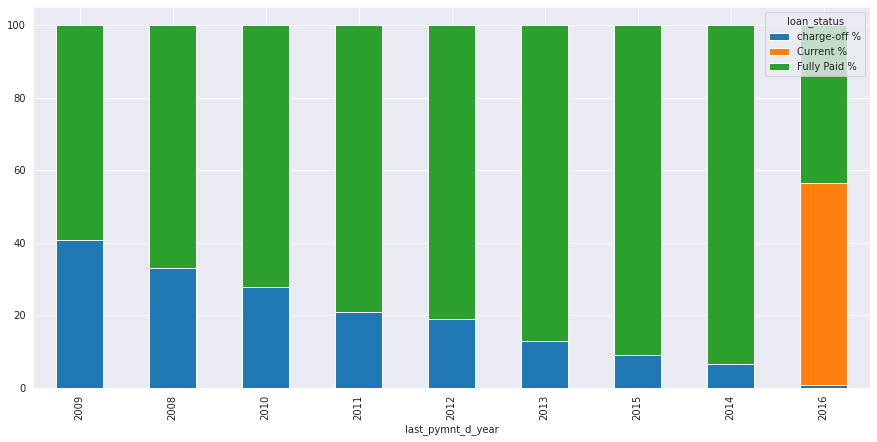

+-------------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
| last_pymnt_d_year | Charged Off | Current | Fully Paid | Total_no_loan | charge-off % | Current % | Fully Paid % |
+-------------------+-------------+---------+------------+---------------+--------------+-----------+--------------+
|       2009.0      |    228.0    |   0.0   |   331.0    |     559.0     |    40.79     |    0.0    |    59.21     |
|       2008.0      |     45.0    |   0.0   |    92.0    |     137.0     |    32.85     |    0.0    |    67.15     |
|       2010.0      |    513.0    |   0.0   |   1335.0   |     1848.0    |    27.76     |    0.0    |    72.24     |
|       2011.0      |    1036.0   |   0.0   |   3960.0   |     4996.0    |    20.74     |    0.0    |    79.26     |
|       2012.0      |    1682.0   |   0.0   |   7222.0   |     8904.0    |    18.89     |    0.0    |    81.11     |
|       2013.0      |    1219.0   |   0.0   |   8239.0   |     9

In [156]:
percentage('last_pymnt_d_year','loan_status',loan_data)

**Observation**

41% of loans, whose last payment have been recieved in the year of 2009, are Charged Off.

# **Feature loan_amount_vs_annual_inc_ratio :**

This is the ratio of loan amout to be sanctioned and the annual income of the borrowers 

In [157]:
loan_data['loan_amount_vs_annual_inc_ratio'].describe()

count    39717.000000
mean        18.791382
std         11.637012
min          0.078947
25%         10.000000
50%         16.610192
75%         25.131119
max         83.000000
Name: loan_amount_vs_annual_inc_ratio, dtype: float64

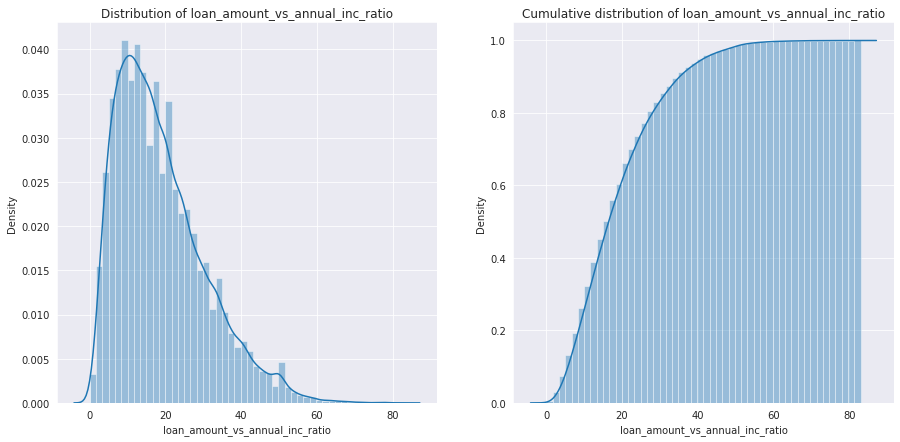

In [158]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
sns.distplot(loan_data['loan_amount_vs_annual_inc_ratio'],ax= axes[0])
axes[0].set_title('Distribution of loan_amount_vs_annual_inc_ratio')

kwargs = {'cumulative': True}
sns.distplot(loan_data['loan_amount_vs_annual_inc_ratio'],hist_kws=kwargs, kde_kws=kwargs,ax= axes[1])
axes[1].set_title('Cumulative distribution of loan_amount_vs_annual_inc_ratio')

plt.show()

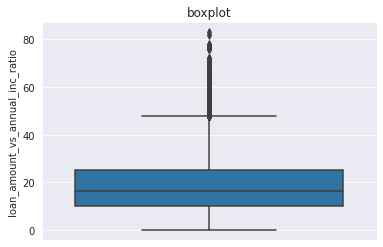

In [159]:
sns.boxplot(y=loan_data['loan_amount_vs_annual_inc_ratio'])
plt.title('boxplot')
plt.show()

**Percentile analysis of loan amount**

In [160]:
for i in range(0,101,10):
    print('{} percetile {}'.format(i,np.percentile(loan_data['loan_amount_vs_annual_inc_ratio'],i)))

0 percetile 0.07894736842105263
10 percetile 5.88235294117647
20 percetile 8.571428571428571
30 percetile 11.11111111111111
40 percetile 13.725490196078432
50 percetile 16.61019201381968
60 percetile 19.672131147540984
70 percetile 23.25581395348837
80 percetile 27.996850296442698
90 percetile 35.08771929824561
100 percetile 83.0


In [161]:
for i in range(90,101,1):
    print('{} percetile {}'.format(i,np.percentile(loan_data['loan_amount_vs_annual_inc_ratio'],i)))

90 percetile 35.08771929824561
91 percetile 36.11111111111111
92 percetile 37.3134328358209
93 percetile 38.46153846153847
94 percetile 40.0
95 percetile 41.66666666666667
96 percetile 43.41674855333552
97 percetile 45.83150015276503
98 percetile 49.01960784313725
99 percetile 52.10429891522697
100 percetile 83.0



**Observation**

The distribution of the loan_amount_vs_annual_inc_ratio  is right skewed .

Most of the cases (almost 75% person who have taken loan ), the loan amout to be sanctioned is less or equal to 25% of the annual income of the borrowers 

# Analysis between 'loan_status' and 'loan_amount_vs_annual_inc_ratio'

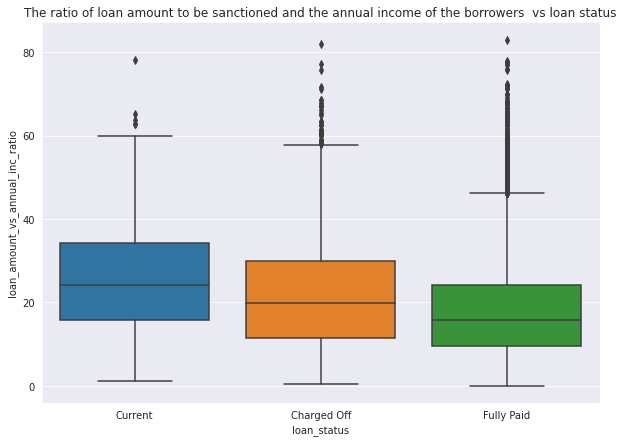

+-------------+---------+-------+-------+------+-------+-------+-------+-------+
| loan_status |  count  |  mean |  std  | min  |  25%  |  50%  |  75%  |  max  |
+-------------+---------+-------+-------+------+-------+-------+-------+-------+
| Charged Off |  5627.0 | 21.88 | 13.01 | 0.52 |  11.5 | 19.88 |  30.0 | 81.97 |
|   Current   |  1140.0 | 25.83 | 13.15 | 1.19 | 15.89 | 24.22 | 34.32 | 78.12 |
|  Fully Paid | 32950.0 | 18.02 | 11.16 | 0.08 |  9.56 |  15.8 | 24.24 |  83.0 |
+-------------+---------+-------+-------+------+-------+-------+-------+-------+


In [162]:
plt.figure(figsize=(10,7))
order_desc = loan_data.groupby('loan_status').loan_amount_vs_annual_inc_ratio.median().sort_values(ascending = False).index
sns.boxplot(x= loan_data.loan_status, y = loan_data.loan_amount_vs_annual_inc_ratio,order = order_desc)
plt.title('The ratio of loan amount to be sanctioned and the annual income of the borrowers  vs loan status')
plt.show()
x = pd.DataFrame(loan_data.groupby('loan_status').loan_amount_vs_annual_inc_ratio.describe().round(2))
x.reset_index(inplace=True)
print(datadisplay(x))

**Observation**

If the loan amout to be sanctioned is more than 20% of the annual income of the borrowers ,then there will be a chance to be defaulters

# **Conclusion**



1. Most of the loans which have been sanctioned are fully paid. only 14% loans are defaulters.

2.  The high loan amount can cause of high interest which will increase the chances of charged off loan.

3.  The loan amount sanctioned for the high graded loans are less than the others with lowest interest and they have a very less chance to be charged off.

4. The persons, who are having more than 10 years of working experience, are taking more loans and also the loan amount is high.

5. Loan defaults are higher for lower income.

6. Interest rate is high if the duration of term is more which will increase the possibility of the loan to be charged off 

7. If the loan amount is large and it has been taken for long duration then the installment paid by per month is also high. In such case there is a high risk to be defaulter.

8. The persons who are staying in rented house are taking maximum loan and they have a high possibility to become defaulter.

9. The loan of high amount are mostly taken by small_business and the chances to be charged off is also high

10. The highest average loan amount that was charged off have been sanctioned for the state WY.NE ,NV,AK are the state where the percentage of charged off is high.States with higher Charge Off rates have very low number of loans.

11. dti ratio is high for the charged off loan.

12. The number of public record bankruptcies is high, the possibility to be defaulter is also high.

13. 41% of loans, whose last payment have been recieved in the year of 2009, are Charged Off.

14. If the loan amount to be sanctioned is more than 20% of the annual income of the borrowers ,then there will be a chance to be defaulters



